In [2]:
import matplotlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib notebook

# Load data

### 1.) each_zeolite_info 
Zeolite channel geometry data

In [4]:
each_zeolite = pd.read_csv('../../../data/chemistry-channel-info/each-zeolite-info.csv', 
                           dtype={'zeolite': str})
each_zeolite

/Users/samhoover/anaconda3/envs/python37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


zeolite   set        kH_C18        kH_C24        kH_C30       kH_2C17  \
0         ABW-0   IZA  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1         ABW-1   IZA  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2         ACO-0   IZA  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
3         AEI-0   IZA  1.738134e-09  2.062889e-13  1.473491e-14  1.179514e-09   
4         AEI-1   IZA  1.457747e-08  1.820195e-14  0.000000e+00  1.186425e-08   
...         ...   ...           ...           ...           ...           ...   
331569  8331168  PCOD  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
331570  8331169  PCOD  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
331571  8331170  PCOD  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
331572  8331171  PCOD  3.334806e+00  8.054900e-01  7.720075e-01  3.259631e+00   
331573  8331172  PCOD  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

             kH_4C17      kH_22C16           U_C18           U_C24  ...  \
0       0.000000e+00  0.000000e+00  505.3769670548  729.9573496964  ...   
1       0.000000e+00  0.000000e+00  798.8761754772             NaN  ...   
2       0.000000e+00  0.000000e+00  291.7543179456  413.6743325738  ...   
3       5.203304e-08  7.884349e-10  -39.3565206512  -21.4450331362  ...   
4       1.950043e-07  4.871419e-09  -42.8064146355   -6.8348403793  ...   
...              ...           ...             ...             ...  ...   
331569  0.000000e+00  0.000000e+00           10000           10000  ...   
331570  0.000000e+00  0.000000e+00           10000           10000  ...   
331571  0.000000e+00  0.000000e+00           10000           10000  ...   
331572  9.330751e-01  1.206711e+00        -144.724        -196.604  ...   
331573  0.000000e+00  0.000000e+00           10000           10000  ...   

        LCD_max  PLD_min  PLD_max LCD_free_min LCD_free_max num_channels  \
0       4.08290  3.34747  3.34747      4.08290      4.08290            2   
1       3.81867  3.34501  3.34501      3.81867      3.81867            2   
2       4.41809  3.40354  3.40354      4.41809      4.41809            1   
3       7.17261  3.68131  3.68131      7.17261      7.17261            1   
4       7.31458  3.66592  3.66592      7.31458      7.31458            1   
...         ...      ...      ...          ...          ...          ...   
331569      NaN      NaN      NaN          NaN          NaN            0   
331570      NaN      NaN      NaN          NaN          NaN            0   
331571      NaN      NaN      NaN          NaN          NaN            0   
331572  5.98227  4.33340  4.33340      5.98227      5.98227            1   
331573      NaN      NaN      NaN          NaN          NaN            0   

       dimensionality largest_inc_sphere largest_free_sphere  \
0                 1.0            4.08290             3.34747   
1                 1.0            3.81867             3.34501   
2                 3.0            4.41809             3.40354   
3                 3.0            7.17261             3.68131   
4                 3.0            7.31458             3.66592   
...               ...                ...                 ...   
331569            0.0            0.00000             0.00000   
331570            0.0            0.00000             0.00000   
331571            0.0            0.00000             0.00000   
331572            3.0            5.98227             4.33340   
331573            0.0            0.00000             0.00000   

       largest_inc_sphere_free_path  
0                           4.08290  
1                           3.81867  
2                           4.41809  
3                           7.17261  
4                           7.31458  
...                             ...  
331569                      0.00000  
331570                      0.00000  
331571                      0.00000  
331572                      5.98227  
331573                      0.0000

### 2.) psd_chan
Add pore size distribution data for IZA zeolites to `each_zeolite`

In [9]:
df_psd = pd.read_csv('../../../data/zeolite-geometry/IZA-psd-info.csv')
df_psd.insert(1, 'set', 'IZA')  # add column for dataset location
psd_chan = df_psd.merge(each_zeolite, left_on=['zeolite', 'set'], right_on=['zeolite', 'set'])
psd_chan

zeolite  set      mean  1st_quartile  median  3rd_quartile        kH_C18  \
0     ABW-0  IZA  4.000000           4.0     4.0           4.0  0.000000e+00   
1     ABW-1  IZA  3.800000           3.8     3.8           3.8  0.000000e+00   
2     ACO-0  IZA  4.370153           4.4     4.4           4.4  0.000000e+00   
3     AEI-0  IZA  7.052535           7.1     7.1           7.1  1.738134e-09   
4     AEI-1  IZA  7.246816           7.3     7.3           7.3  1.457747e-08   
..      ...  ...       ...           ...     ...           ...           ...   
397   WEN-0  IZA  5.188345           5.3     5.3           5.3  1.358950e+01   
398   YUG-0  IZA  4.248834           4.3     4.3           4.3  0.000000e+00   
399   YUG-1  IZA  3.643122           3.7     3.7           3.7  0.000000e+00   
400   ZON-0  IZA  5.557995           5.6     5.6           5.6  0.000000e+00   
401   ZON-1  IZA  5.666536           5.7     5.7           5.7  0.000000e+00   

           kH_C24        kH_C30       kH_2C17  ...  LCD_max  PLD_min  PLD_max  \
0    0.000000e+00  0.000000e+00  0.000000e+00  ...  4.08290  3.34747  3.34747   
1    0.000000e+00  0.000000e+00  0.000000e+00  ...  3.81867  3.34501  3.34501   
2    0.000000e+00  0.000000e+00  0.000000e+00  ...  4.41809  3.40354  3.40354   
3    2.062889e-13  1.473491e-14  1.179514e-09  ...  7.17261  3.68131  3.68131   
4    1.820195e-14  0.000000e+00  1.186425e-08  ...  7.31458  3.66592  3.66592   
..            ...           ...           ...  ...      ...      ...      ...   
397  1.459364e+01  4.156882e+01  2.819359e-01  ...  5.36771  4.67539  4.67539   
398  0.000000e+00  0.000000e+00  0.000000e+00  ...  4.33066  2.96121  2.96121   
399  0.000000e+00  0.000000e+00  0.000000e+00  ...  3.76762  3.05726  3.05726   
400  0.000000e+00  0.000000e+00  0.000000e+00  ...  5.67236  3.36011  3.36011   
401  0.000000e+00  0.000000e+00  0.000000e+00  ...  5.79332  3.34998  3.34998   

    LCD_free_min LCD_free_max num_channels dimensionality largest_inc_sphere  \
0        4.08290      4.08290            2            1.0            4.08290   
1        3.81867      3.81867            2            1.0            3.81867   
2        4.41809      4.41809            1            3.0            4.41809   
3        7.17261      7.17261            1            3.0            7.17261   
4        7.31458      7.31458            1            3.0            7.31458   
..           ...          ...          ...            ...                ...   
397      5.36771      5.36771            1            3.0            5.36771   
398      4.33066      4.33066            2            2.0            4.33066   
399      3.76762      3.76762            2            1.0            3.76762   
400      5.67236      5.67236            2            1.0            5.67236   
401      5.79332      5.79332            4            1.0            5.79332   

    largest_free_sphere largest_inc_sphere_free_path  
0               3.34747                      4.08290  
1               3.34501                      3.81867  
2               3.40354                      4.41809  
3               3.68131                      7.17261  
4               3.66592                      7.31458  
..                  ...                          ...  
397             4.67539                      5.36771  
398             2.96121                      4.33066  
399             3.05726                      3.76762  
400             3.36011                      5.67236  
401             3.34998                      5.79332  

[402 rows x 42 columns]

### 3.) IZA_all
Chemical and channel geometry data for IZA zeolites

In [10]:
IZA_all = each_zeolite[each_zeolite.set == 'IZA']
IZA_all

zeolite  set        kH_C18        kH_C24        kH_C30       kH_2C17  \
0     ABW-0  IZA  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1     ABW-1  IZA  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2     ACO-0  IZA  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
3     AEI-0  IZA  1.738134e-09  2.062889e-13  1.473491e-14  1.179514e-09   
4     AEI-1  IZA  1.457747e-08  1.820195e-14  0.000000e+00  1.186425e-08   
..      ...  ...           ...           ...           ...           ...   
397   WEN-0  IZA  1.358950e+01  1.459364e+01  4.156882e+01  2.819359e-01   
398   YUG-0  IZA  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
399   YUG-1  IZA  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
400   ZON-0  IZA  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
401   ZON-1  IZA  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          kH_4C17      kH_22C16            U_C18            U_C24  ...  \
0    0.000000e+00  0.000000e+00   505.3769670548   729.9573496964  ...   
1    0.000000e+00  0.000000e+00   798.8761754772              NaN  ...   
2    0.000000e+00  0.000000e+00   291.7543179456   413.6743325738  ...   
3    5.203304e-08  7.884349e-10   -39.3565206512   -21.4450331362  ...   
4    1.950043e-07  4.871419e-09   -42.8064146355    -6.8348403793  ...   
..            ...           ...              ...              ...  ...   
397  1.219671e+00  1.737344e-06  -171.3924042481  -197.1836773597  ...   
398  0.000000e+00  0.000000e+00   418.4588399024              NAN  ...   
399  0.000000e+00  0.000000e+00              NaN              NaN  ...   
400  0.000000e+00  0.000000e+00   300.2051546844   462.4980829025  ...   
401  0.000000e+00  0.000000e+00   132.9939103419   319.1078198689  ...   

     LCD_max  PLD_min  PLD_max LCD_free_min LCD_free_max num_channels  \
0    4.08290  3.34747  3.34747      4.08290      4.08290            2   
1    3.81867  3.34501  3.34501      3.81867      3.81867            2   
2    4.41809  3.40354  3.40354      4.41809      4.41809            1   
3    7.17261  3.68131  3.68131      7.17261      7.17261            1   
4    7.31458  3.66592  3.66592      7.31458      7.31458            1   
..       ...      ...      ...          ...          ...          ...   
397  5.36771  4.67539  4.67539      5.36771      5.36771            1   
398  4.33066  2.96121  2.96121      4.33066      4.33066            2   
399  3.76762  3.05726  3.05726      3.76762      3.76762            2   
400  5.67236  3.36011  3.36011      5.67236      5.67236            2   
401  5.79332  3.34998  3.34998      5.79332      5.79332            4   

    dimensionality largest_inc_sphere largest_free_sphere  \
0              1.0            4.08290             3.34747   
1              1.0            3.81867             3.34501   
2              3.0            4.41809             3.40354   
3              3.0            7.17261             3.68131   
4              3.0            7.31458             3.66592   
..             ...                ...                 ...   
397            3.0            5.36771             4.67539   
398            2.0            4.33066             2.96121   
399            1.0            3.76762             3.05726   
400            1.0            5.67236             3.36011   
401            1.0            5.79332             3.34998   

    largest_inc_sphere_free_path  
0                        4.08290  
1                        3.81867  
2                        4.41809  
3                        7.17261  
4                        7.31458  
..                           ...  
397                      5.36771  
398                      4.33066  
399                      3.76762  
400                      5.67236  
401                      5.79332  

[402 rows x 38 columns]

### 4.) nonzero_kH_C18
C18-specific chemical and channel geometry data for nonzero-kH_C18 zeolites

In [11]:
nonzero_dim_C18 = pd.read_csv('../../../data/chemistry-channel-info/C18-dim_C18-nonzero.csv')
nonzero_dim_C18

kH_C18       U_C18    SETE_C18  dim_C18  geometrical_dimension  \
0       0.000000e+00  505.376967  481.227323        1                      1   
1       0.000000e+00  798.876175  425.469635        1                      1   
2       0.000000e+00  291.754318  270.706661        3                      3   
3       1.738134e-09  -39.356521  141.111020        3                      3   
4       1.457747e-08  -42.806415  156.702076        3                      3   
...              ...         ...         ...      ...                    ...   
171084  6.119182e-06  -31.803883   35.180627        3                      0   
171085  4.083667e-05  -78.699431  139.018049        3                      3   
171086  7.924689e+01  -71.840573  128.047097        3                      3   
171087  9.296409e+01  -70.553838  142.195420        3                      0   
171088  3.334806e+00 -144.723654  290.738392        3                      3   

        num_channels   LCD_min   LCD_max  PLD_min  PLD_max  LCD_free_min  \
0                  2   4.08290   4.08290  3.34747  3.34747       4.08290   
1                  2   3.81867   3.81867  3.34501  3.34501       3.81867   
2                  1   4.41809   4.41809  3.40354  3.40354       4.41809   
3                  1   7.17261   7.17261  3.68131  3.68131       7.17261   
4                  1   7.31458   7.31458  3.66592  3.66592       7.31458   
...              ...       ...       ...      ...      ...           ...   
171084             0   0.00000   0.00000  0.00000  0.00000       0.00000   
171085             2   9.99381   9.99381  3.64882  3.64882       9.99381   
171086             2  16.65820  16.65820  3.75074  3.75074      16.65820   
171087             0   0.00000   0.00000  0.00000  0.00000       0.00000   
171088             1   5.98227   5.98227  4.33340  4.33340       5.98227   

        LCD_free_max  
0            4.08290  
1            3.81867  
2            4.41809  
3            7.17261  
4            7.31458  
...              ...  
171084       0.00000  
171085       9.99381  
171086      16.65820  
171087       0.00000  
171088       5.98227  

[171089 rows x 12 columns]

# Make C18 DataFrame

In [12]:
# check datatype of each column
cols = ['kH_C18', 'U_C18', 'SETE_C18', 'dim_C18', 'geometrical_dimension', 'num_channels', 
        'LCD_min', 'LCD_max', 'PLD_min', 'PLD_max', 'LCD_free_min', 'LCD_free_max']

C18_df = each_zeolite[cols]
C18_df.dtypes

kH_C18                   float64
U_C18                     object
SETE_C18                  object
dim_C18                    int64
geometrical_dimension    float64
num_channels               int64
LCD_min                  float64
LCD_max                  float64
PLD_min                  float64
PLD_max                  float64
LCD_free_min             float64
LCD_free_max             float64
dtype: object

In [103]:
# replace str NaNs with actual NaNs
C18_df = C18_df.replace('nan', np.nan)

In [142]:
# replace NaN in channel info columns to 0
chan_cols = ['dim_C18', 'geometrical_dimension', 'LCD_min', 'LCD_max', 
             'PLD_min', 'PLD_max', 'LCD_free_min', 'LCD_free_max']
C18_df[chan_cols] = C18_df[chan_cols].replace(np.nan, 0)

In [143]:
# change `object` datatype columns to float
C18_df.U_C18 = C18_df.U_C18.astype(float)
C18_df.SETE_C18 = C18_df.SETE_C18.astype(float)
C18_df.geometrical_dimension = C18_df.geometrical_dimension.astype(int)

In [144]:
C18_df.dtypes

kH_C18                   float64
U_C18                    float64
SETE_C18                 float64
dim_C18                    int64
geometrical_dimension      int64
num_channels               int64
LCD_min                  float64
LCD_max                  float64
PLD_min                  float64
PLD_max                  float64
LCD_free_min             float64
LCD_free_max             float64
dtype: object

In [145]:
C18_df

kH_C18         U_C18      SETE_C18  dim_C18  \
0       0.000000e+00    505.376967    481.227323        1   
1       0.000000e+00    798.876175    425.469635        1   
2       0.000000e+00    291.754318    270.706661        3   
3       1.738134e-09    -39.356521    141.111020        3   
4       1.457747e-08    -42.806415    156.702076        3   
...              ...           ...           ...      ...   
331569  0.000000e+00  10000.000000  10000.000000        0   
331570  0.000000e+00  10000.000000  10000.000000        0   
331571  0.000000e+00  10000.000000  10000.000000        0   
331572  3.334806e+00   -144.723654    290.738392        3   
331573  0.000000e+00  10000.000000  10000.000000        0   

        geometrical_dimension  num_channels  LCD_min  LCD_max  PLD_min  \
0                           1             2  4.08290  4.08290  3.34747   
1                           1             2  3.81867  3.81867  3.34501   
2                           3             1  4.41809  4.41809  3.40354   
3                           3             1  7.17261  7.17261  3.68131   
4                           3             1  7.31458  7.31458  3.66592   
...                       ...           ...      ...      ...      ...   
331569                      0             0  0.00000  0.00000  0.00000   
331570                      0             0  0.00000  0.00000  0.00000   
331571                      0             0  0.00000  0.00000  0.00000   
331572                      3             1  5.98227  5.98227  4.33340   
331573                      0             0  0.00000  0.00000  0.00000   

        PLD_max  LCD_free_min  LCD_free_max  
0       3.34747       4.08290       4.08290  
1       3.34501       3.81867       3.81867  
2       3.40354       4.41809       4.41809  
3       3.68131       7.17261       7.17261  
4       3.66592       7.31458       7.31458  
...         ...           ...           ...  
331569  0.00000       0.00000       0.00000  
331570  0.00000       0.00000       0.00000  
331571  0.00000       0.00000       0.00000  
331572  4.33340       5.98227       5.98227  
331573  0.00000       0.00000       0.00000  

[331574 rows x 12 columns]

In [116]:
C18_df.to_csv('../../data/chemistry-channel-info/C18_df-FULL.csv')

### Create smaller subset of C18_df of zeolites that C18s can adsorb to

In [117]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -1),  # -1 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [146]:
C18_df.dim_C18[C18_df.dim_C18 == 0].count()

160485

<IPython.core.display.Javascript object>


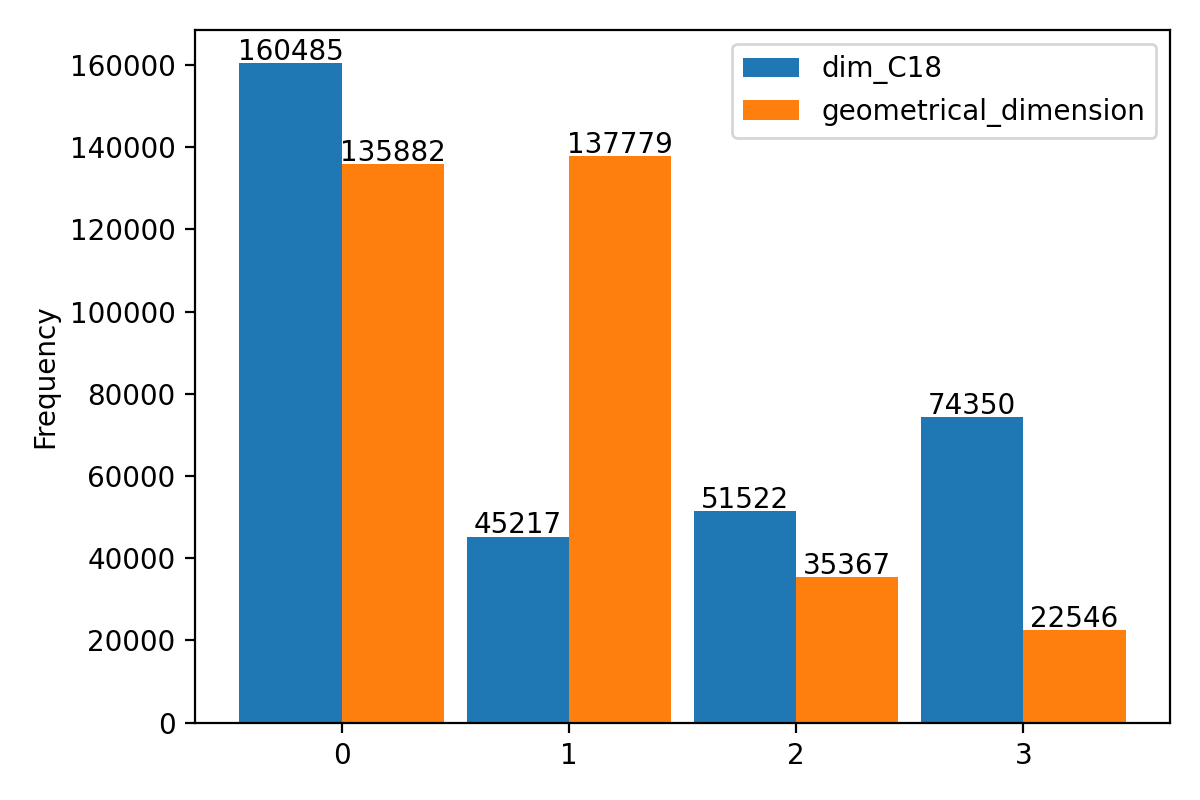

In [133]:
fig, ax = plt.subplots(figsize=(6, 4))

x = np.arange(4)  # the label locations
width = 0.45  # the width of the bars

rect1 = ax.bar(x - width / 2, 
               [C18_df.dim_C18[C18_df.dim_C18 == 0].count(), 
                C18_df.dim_C18[C18_df.dim_C18 == 1].count(),
                C18_df.dim_C18[C18_df.dim_C18 == 2].count(), 
                C18_df.dim_C18[C18_df.dim_C18 == 3].count()],
               width,
               label='dim_C18',
)
rect2 = ax.bar(x + width / 2, 
               [C18_df.geometrical_dimension[C18_df.geometrical_dimension == 0].count(), 
                C18_df.geometrical_dimension[C18_df.geometrical_dimension == 1].count(),
                C18_df.geometrical_dimension[C18_df.geometrical_dimension == 2].count(), 
                C18_df.geometrical_dimension[C18_df.geometrical_dimension == 3].count()],
               width,
               label='geometrical_dimension',
)
ax.set_xticks(x)
ax.set_ylabel('Count')

autolabel(rect1)
autolabel(rect2)

ax.legend()
fig.tight_layout()

In [148]:
C18_df.dim_C18[C18_df.kH_C18 == 0].describe()

count    231053.000000
mean          0.527364
std           0.902833
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           3.000000
Name: dim_C18, dtype: float64

In [149]:
C18_df.dim_C18[C18_df.kH_C18 != 0].describe()

count    100521.000000
mean          2.481690
std           0.696593
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           3.000000
Name: dim_C18, dtype: float64

In [154]:
C18_df.dim_C18[C18_df.num_channels == 0].describe()

count    135882.000000
mean          0.065491
std           0.378340
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: dim_C18, dtype: float64

In [155]:
C18_df.dim_C18[C18_df.num_channels != 0].describe()

count    195692.000000
mean          1.851951
std           1.082360
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: dim_C18, dtype: float64

In [161]:
C18_df[(C18_df.dim_C18 != 0)].describe()

kH_C18          U_C18       SETE_C18        dim_C18  \
count  1.710890e+05  171089.000000  171089.000000  171089.000000   
mean   4.426732e+05      49.176195     353.448679       2.170280   
std    9.847585e+07     257.412283     105.340390       0.818454   
min    0.000000e+00    -296.983288       6.635668       1.000000   
25%    0.000000e+00    -135.182903     292.234472       1.000000   
50%    9.989162e-08     -81.479603     369.312029       2.000000   
75%    1.919723e+03     181.166902     440.648383       3.000000   
max    3.639594e+10     986.472840     508.018792       3.000000   

       geometrical_dimension   num_channels        LCD_min        LCD_max  \
count          171089.000000  171089.000000  171089.000000  171089.000000   
mean                1.414311       2.129430       5.687124       5.916697   
std                 0.741240       1.432924       1.926685       2.010577   
min                 0.000000       0.000000       0.000000       0.000000   
25%                 1.000000       1.000000       4.614790       4.794330   
50%                 1.000000       2.000000       5.296080       5.494270   
75%                 2.000000       2.000000       6.551830       6.834710   
max                 3.000000      16.000000      29.212900      29.212900   

             PLD_min        PLD_max   LCD_free_min   LCD_free_max  
count  171089.000000  171089.000000  171089.000000  171089.000000  
mean        4.291064       4.504550       5.675565       5.904403  
std         1.812438       1.928455       1.926788       2.011981  
min         0.000000       0.000000       0.000000       0.000000  
25%         3.228420       3.349100       4.601440       4.778260  
50%         3.728720       3.892140       5.281780       5.481800  
75%         4.980900       5.313890       6.541230       6.825620  
max        28.782100      28.782100      29.212900      29.212900

<IPython.core.display.Javascript object>


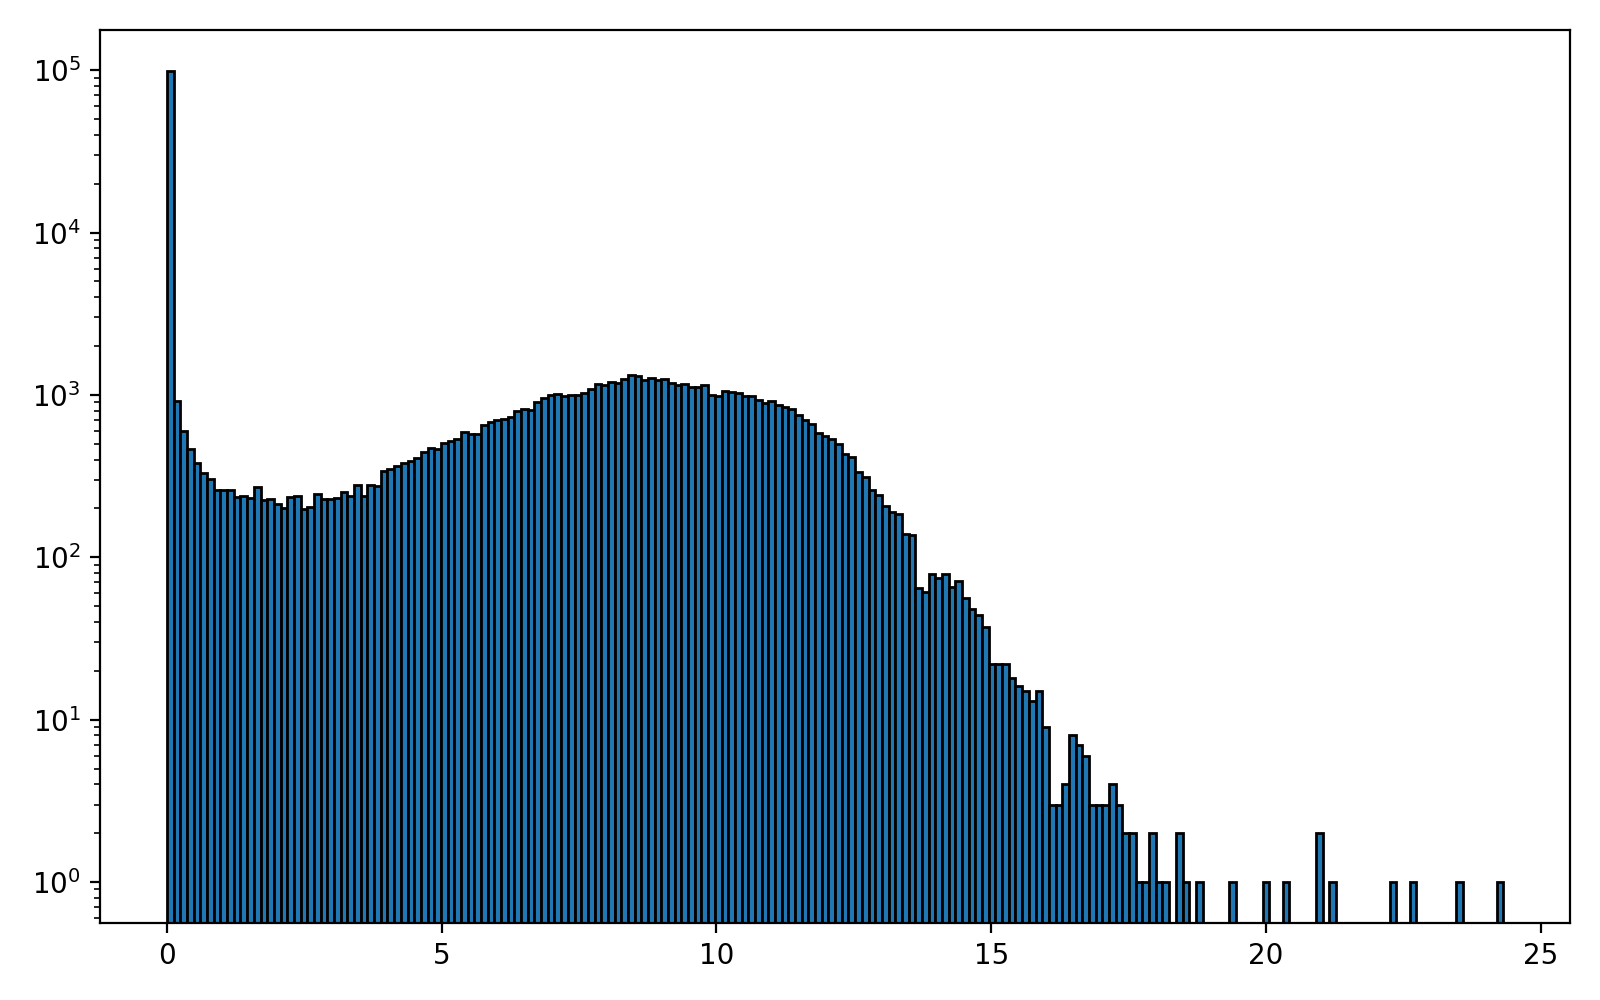

In [177]:
kH_log1p = np.log1p(C18_df.kH_C18[C18_df.dim_C18 != 0])

fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(
    kH_log1p,
    bins=200,
    edgecolor='black',
)
# ax.set_xscale('log')
ax.set_yscale('log')

fig.tight_layout()

In [180]:
C18_df[C18_df.dim_C18 != 0].to_csv('../../data/chemistry-channel-info/C18-permeable.csv', 
                                   index=False)

# Data processing

In [19]:
foo = IZA_all.loc[IZA_all['LCD_max'].isna(), 'zeolite']  # zeolites that LCD_max entry is NaN
bar = psd_chan.loc[psd_chan.num_channels == 0, 'zeolite']  # zeolites that have 0 channels

# do the NaN LCD_max entries occur along with zeolite having 0 channels?
foo.equals(bar)  # yes

True

In [20]:
# discard zeolites with 0 channels
each_zeolite = each_zeolite[each_zeolite.num_channels != 0]
psd_chan = psd_chan[psd_chan.num_channels != 0]

# from above cell, zeolites where LCD_max entry is NaN have no channels
IZA_all = IZA_all[IZA_all.LCD_max.notna()]

<IPython.core.display.Javascript object>


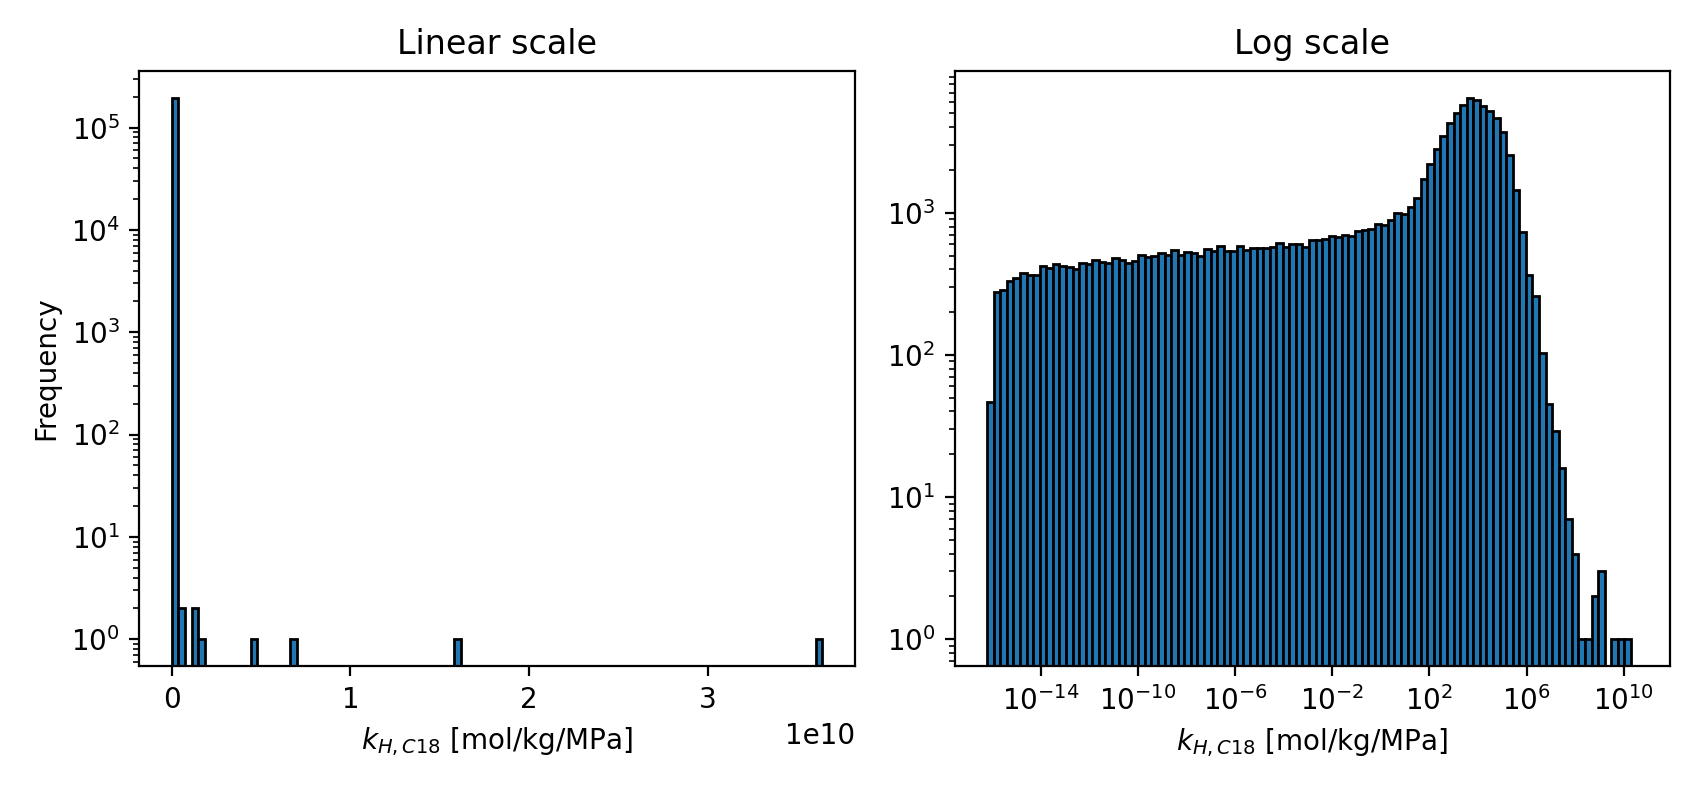

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8.5, 4))
axes[0].hist(each_zeolite.kH_C18,
             bins=np.linspace(each_zeolite.kH_C18.min(),
                              each_zeolite.kH_C18.max(),
                              100),
             edgecolor='black')
axes[0].set_title('Linear scale')
axes[0].set_xlabel('$k_{H,C18}$ [mol/kg/MPa]')
axes[0].set_ylabel('Frequency')
axes[0].set_yscale('log')

# need to ignore 0 kH_C18 for log scale on x-axis
axes[1].hist(each_zeolite.kH_C18, 
             bins=np.logspace(np.log10(each_zeolite.kH_C18[each_zeolite.kH_C18 > 0].min()), 
                              np.log10(each_zeolite.kH_C18[each_zeolite.kH_C18 > 0].max()),
                              100), 
             edgecolor='black')
axes[1].set_title('Log scale')
axes[1].set_xlabel('$k_{H,C18}$ [mol/kg/MPa]')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
fig.tight_layout()

In [10]:
# discard zeolites with kH_C18 > 1e8 mol/kg/MPa
each_zeolite = each_zeolite[each_zeolite.kH_C18 <= 1e8]

<IPython.core.display.Javascript object>


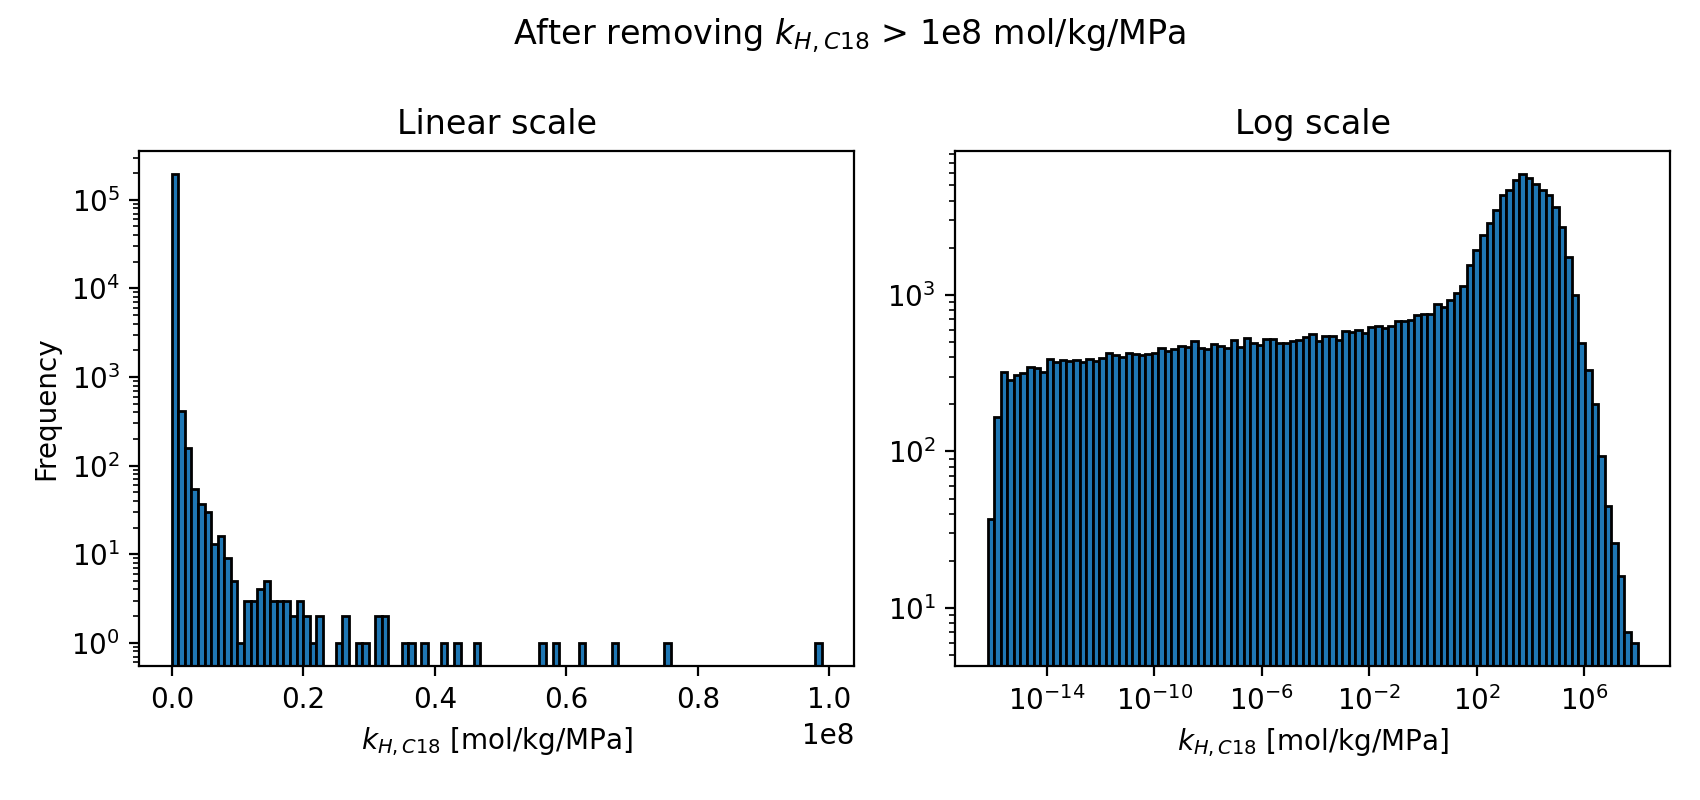

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8.5, 4))
axes[0].hist(each_zeolite.kH_C18,
             bins=np.linspace(each_zeolite.kH_C18.min(),
                              each_zeolite.kH_C18.max(),
                              100),
             edgecolor='black')
axes[0].set_title('Linear scale')
axes[0].set_xlabel('$k_{H,C18}$ [mol/kg/MPa]')
axes[0].set_ylabel('Frequency')
axes[0].set_yscale('log')

# need to ignore 0 kH_C18 for log scale on x-axis
axes[1].hist(each_zeolite.kH_C18, 
             bins=np.logspace(np.log10(each_zeolite.kH_C18[each_zeolite.kH_C18 > 0].min()), 
                              np.log10(each_zeolite.kH_C18[each_zeolite.kH_C18 > 0].max()),
                              100), 
             edgecolor='black')
axes[1].set_title('Log scale')
axes[1].set_xlabel('$k_{H,C18}$ [mol/kg/MPa]')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
fig.suptitle('After removing $k_{H,C18}$ > 1e8 mol/kg/MPa')
fig.tight_layout(rect=[0, 0, 1, 0.90])

# Data visualization

<IPython.core.display.Javascript object>


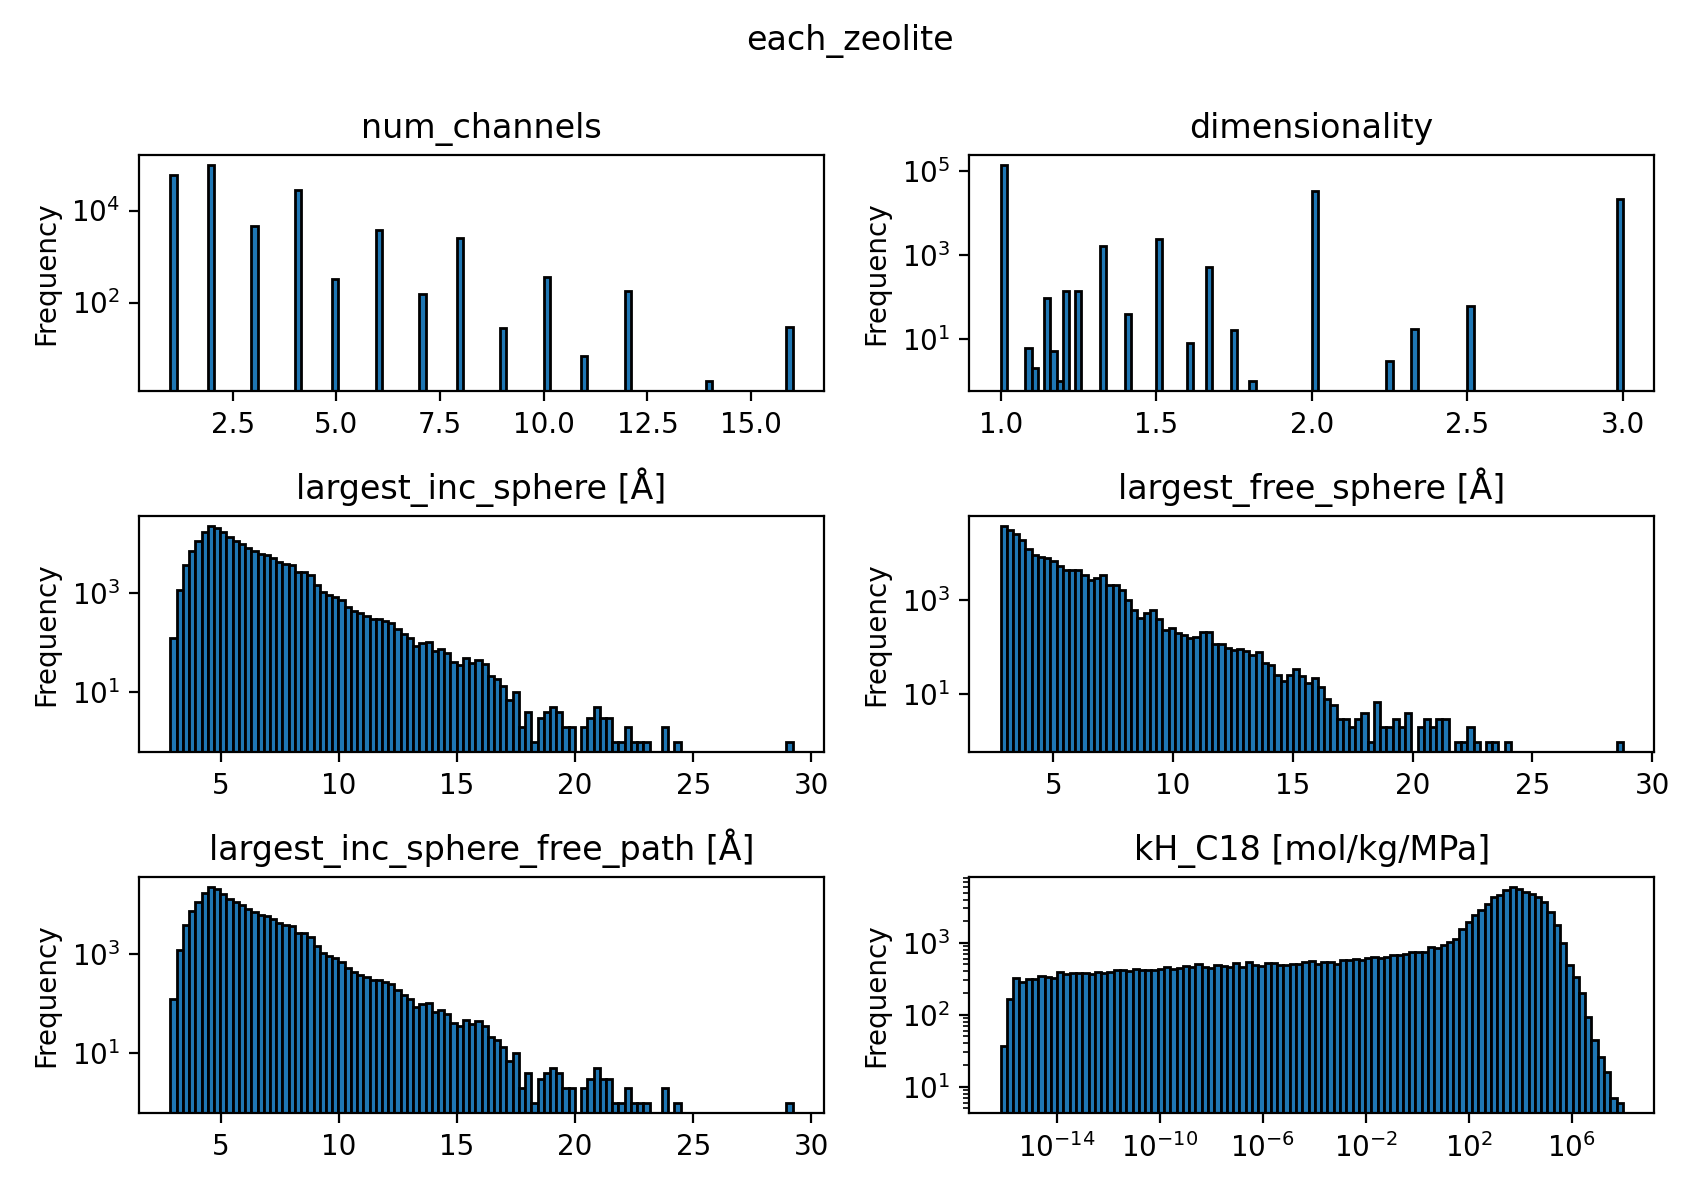

In [12]:
units = ['', '', ' [Å]', ' [Å]', ' [Å]', ' [mol/kg/MPa]']  # units for each column
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8.5, 6))
for i, ax in enumerate(axes.flatten(), start=2):
    if each_zeolite.columns[i] != 'kH_C18':
        ax.hist(each_zeolite[each_zeolite.columns[i]], bins=100, edgecolor='black')
    else:
        ax.hist(each_zeolite.kH_C18[each_zeolite.kH_C18 > 0],
                bins=np.logspace(np.log10(each_zeolite.kH_C18[each_zeolite.kH_C18 > 0].min()), 
                                 np.log10(each_zeolite.kH_C18[each_zeolite.kH_C18 > 0].max()),
                                 100),
                edgecolor='black')
        ax.set_xscale('log')
    ax.set_title(each_zeolite.columns[i] + units[i - 2])
    ax.set_ylabel('Frequency')
    ax.set_yscale('log')
fig.suptitle('each_zeolite')
fig.tight_layout(rect=[0, 0, 1, 0.93])

<IPython.core.display.Javascript object>


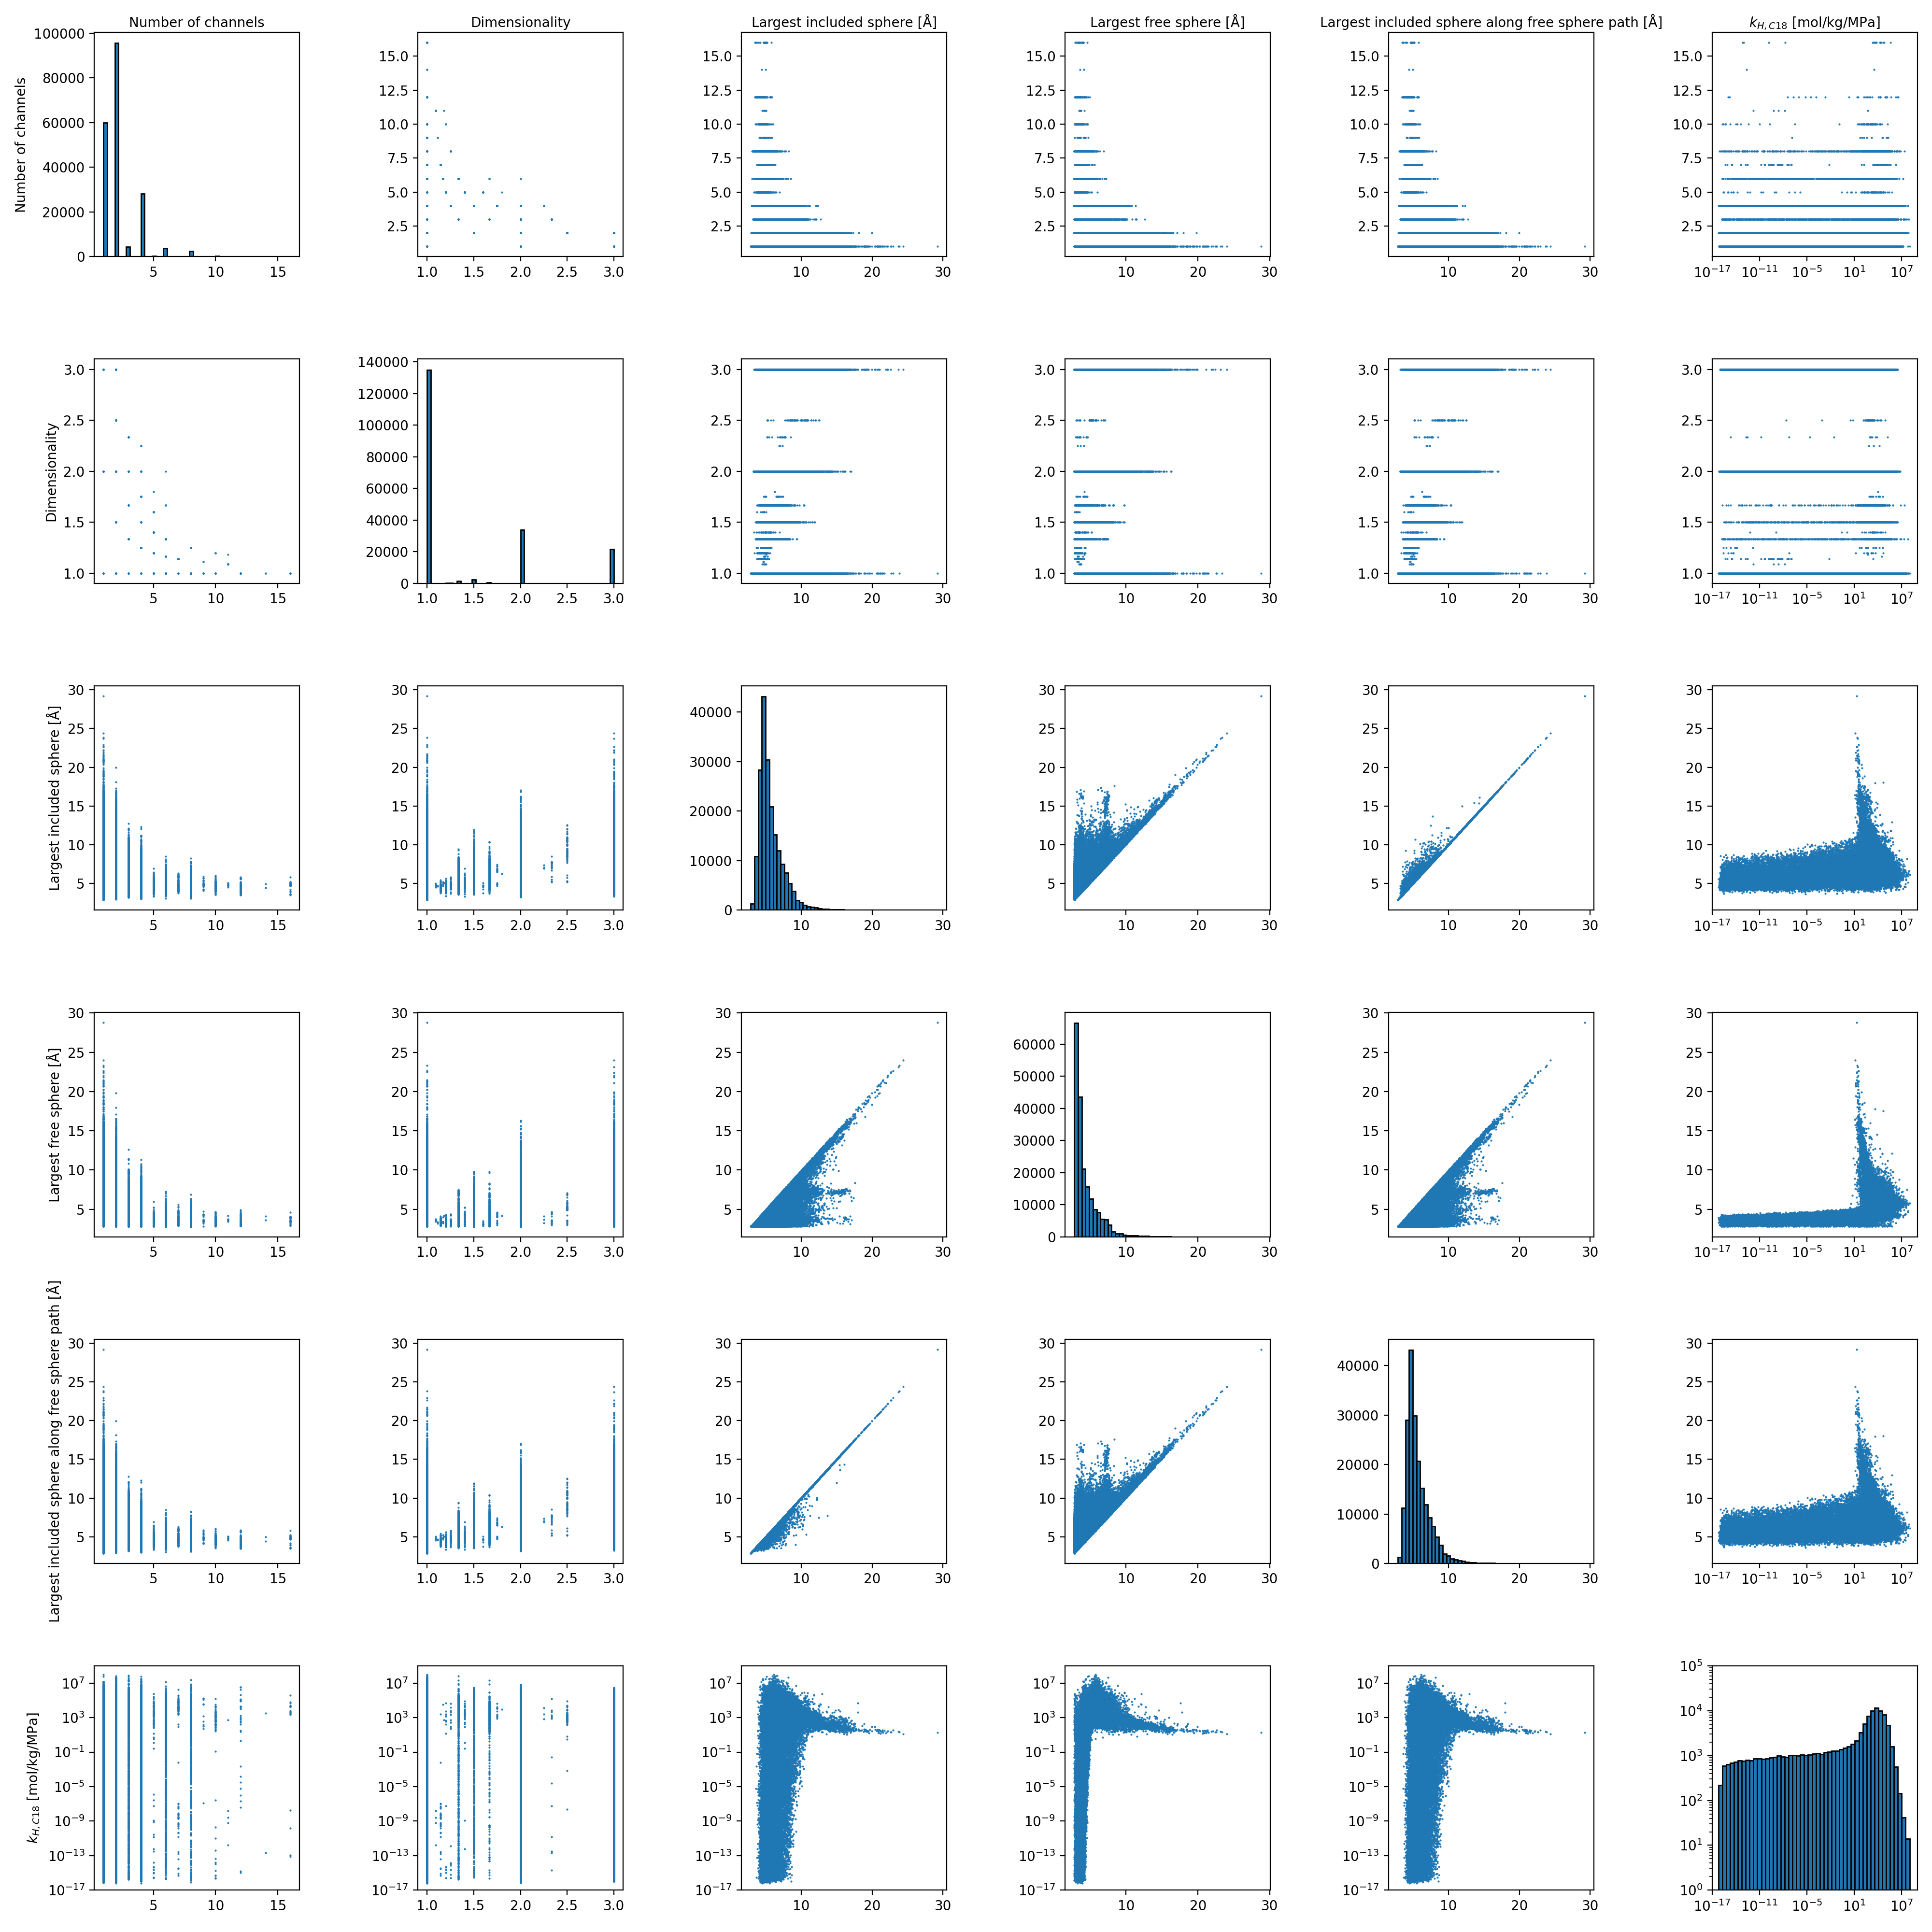

In [91]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20, 20))
axes = axes.flatten()
idx = 0
headers = ['Number of channels', 'Dimensionality', 'Largest included sphere [Å]',
           'Largest free sphere [Å]', 'Largest included sphere along free sphere path [Å]', 
           '$k_{H,C18}$ [mol/kg/MPa]']

for i, row in enumerate(each_zeolite.columns[2:]):
    for j, col in enumerate(each_zeolite.columns[2:]):
        
        # add column labels
        if i == 0:
            axes[idx].set_xlabel(headers[j])
            axes[idx].xaxis.set_label_position('top')
        # add row labels
        if j == 0:            
            axes[idx].set_ylabel(headers[i])
        # change scale for kH_C18 plots
        if row == 'kH_C18':
            axes[idx].set_ylim(1e-17, 1e9)
            axes[idx].set_yscale('log')
        if col == 'kH_C18':
            axes[idx].set_xlim(1e-17, 1e9)
            axes[idx].set_xscale('log')
            
        # histograms for diagonal
        if i == j:
            if i != 5:
                axes[idx].hist(each_zeolite[row], bins=50, edgecolor='black')
            else:
                axes[idx].hist(each_zeolite.kH_C18[each_zeolite.kH_C18 <= 1e8], 
                               bins=np.logspace(
                                   np.log10(each_zeolite.kH_C18[each_zeolite.kH_C18 > 0].min()), 
                                   np.log10(each_zeolite.kH_C18[each_zeolite.kH_C18 > 0].max()),
                                   50), 
                               edgecolor='black')
                # override default limits for logarithm scales
                axes[idx].set_ylim(1, 1e5)
        # scatter plots for off-diagonal
        else:
            axes[idx].scatter(each_zeolite[col], each_zeolite[row], s=1, marker='.')

        idx += 1
plt.tight_layout()
plt.savefig('../figures/feature-distributions/geometry-kH-explainer.png', dpi=600)

<IPython.core.display.Javascript object>


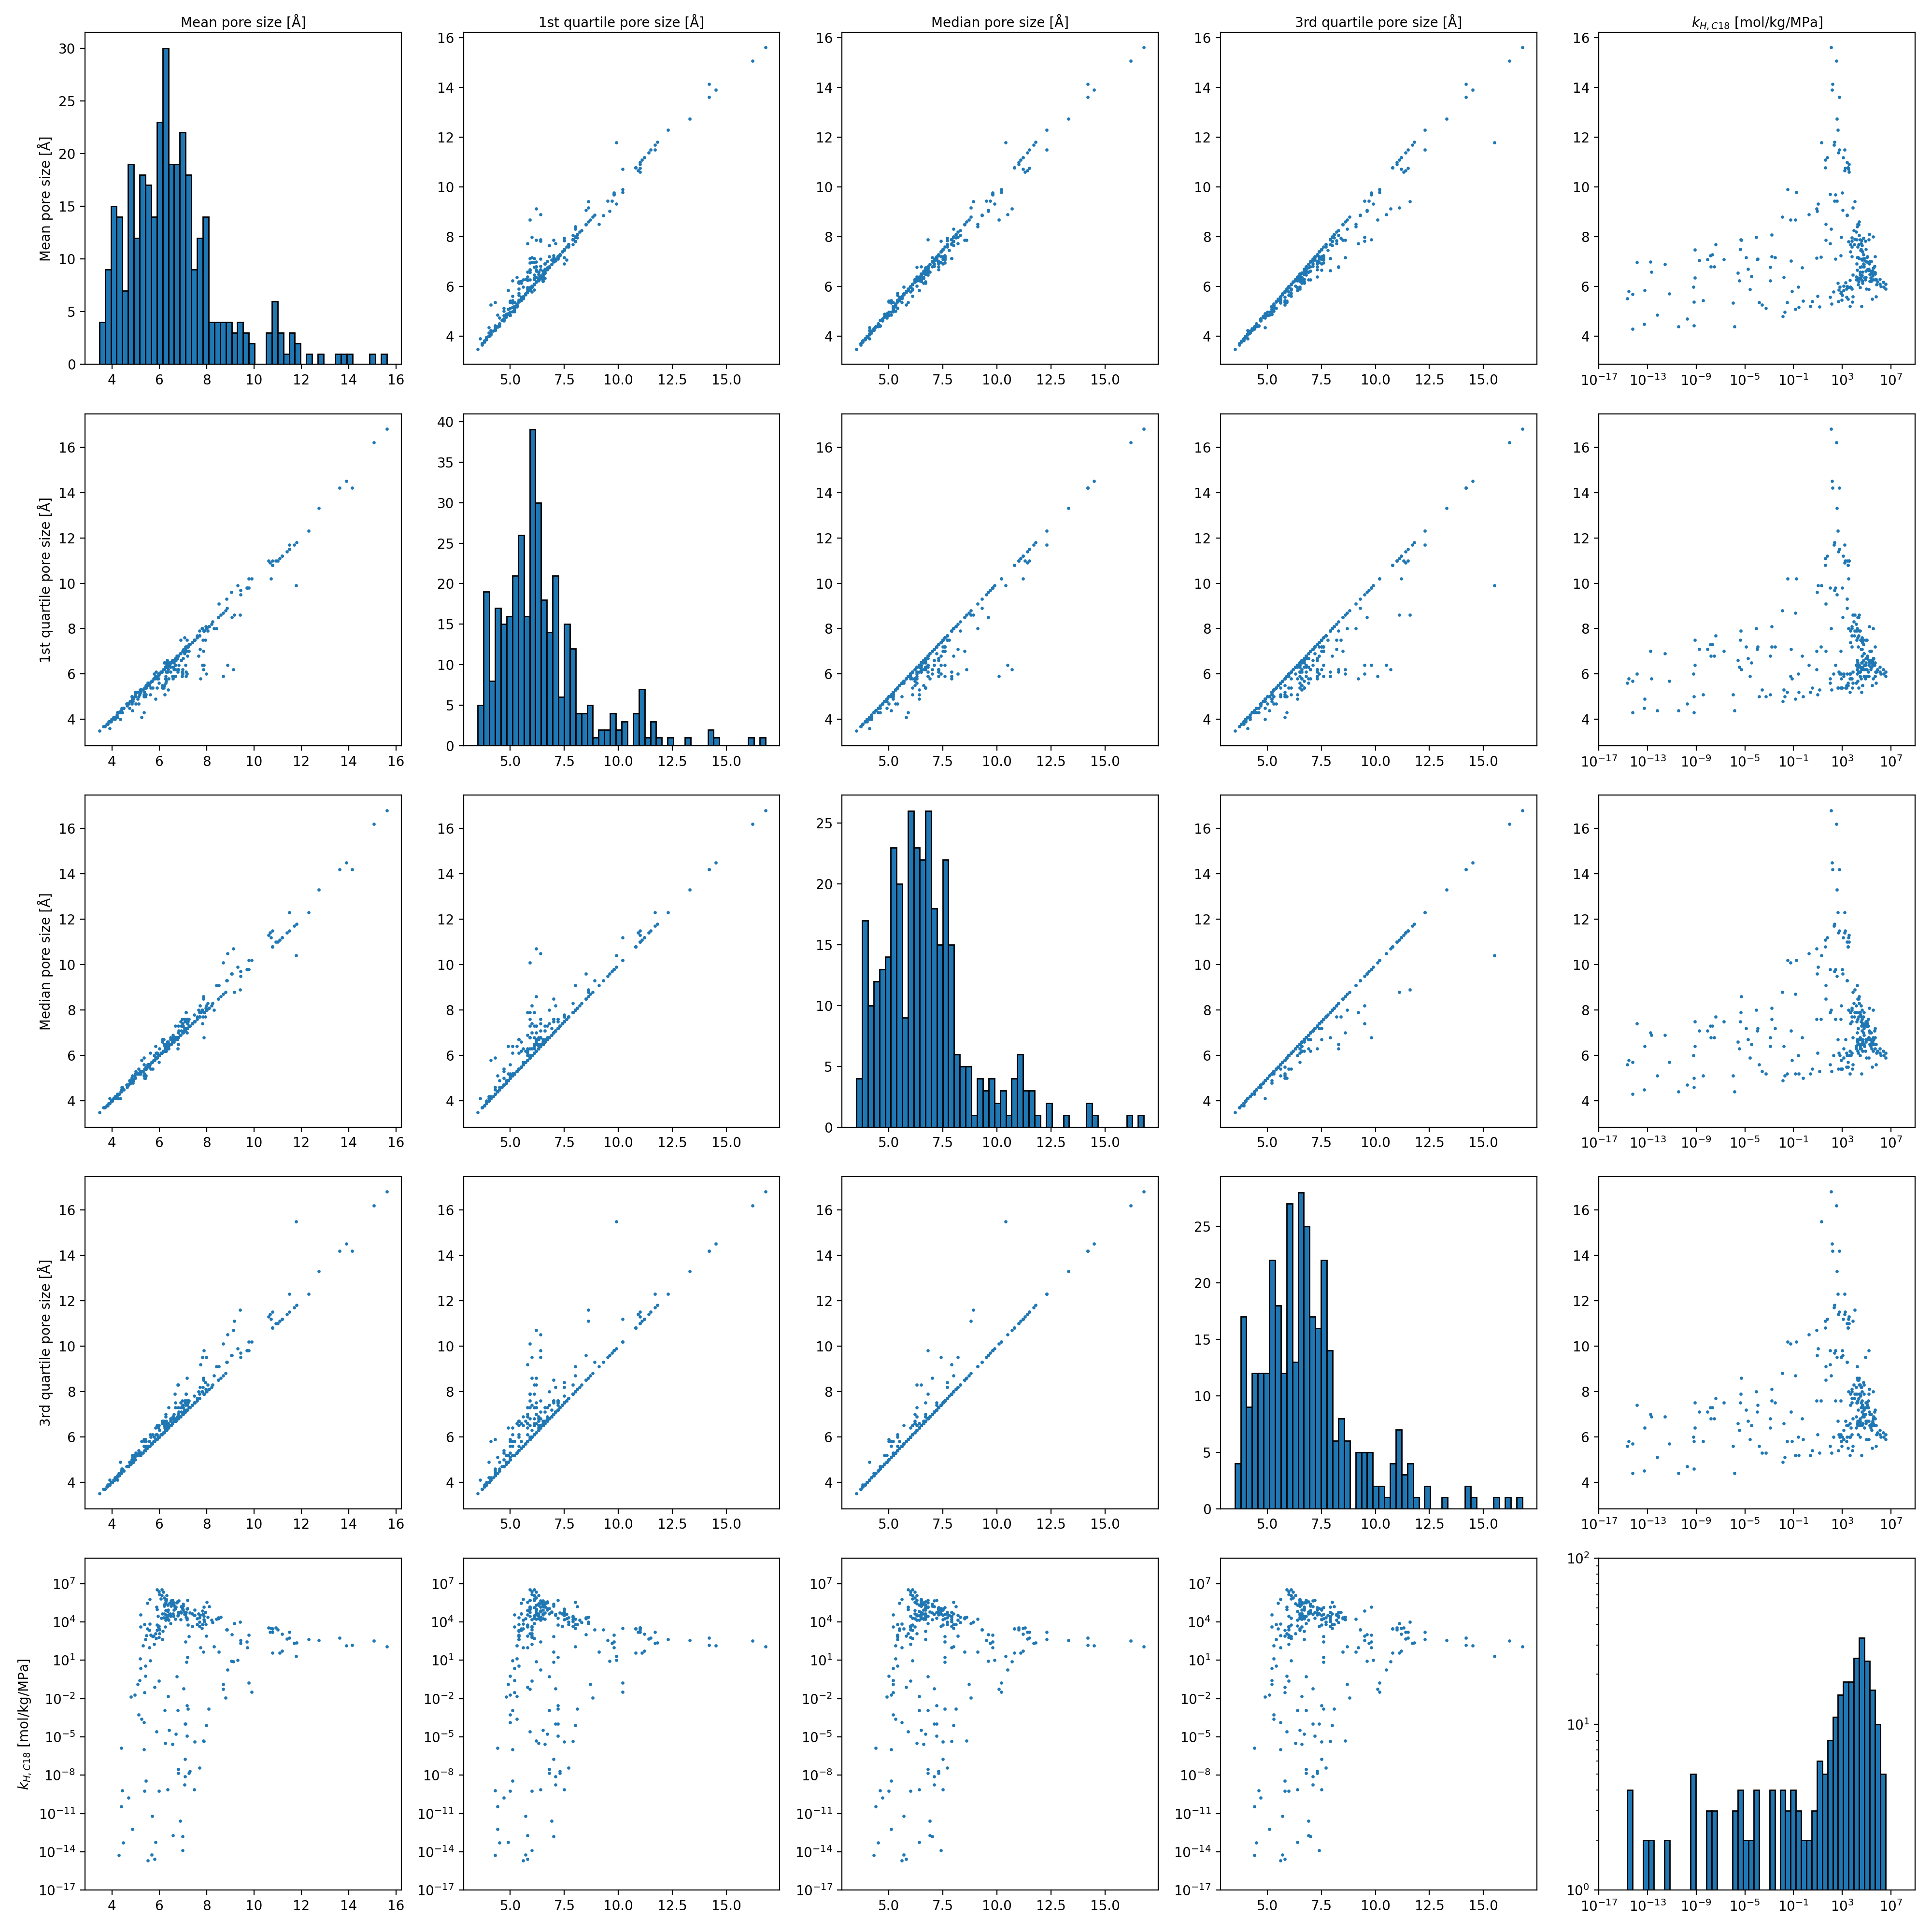

In [125]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
axes = axes.flatten()
idx = 0
headers = ['Mean pore size [Å]', '1st quartile pore size [Å]', 'Median pore size [Å]',
           '3rd quartile pore size [Å]', '$k_{H,C18}$ [mol/kg/MPa]']

for i, row in enumerate(psd_chan.columns[[2, 3, 4, 5, -1]]):
    for j, col in enumerate(psd_chan.columns[[2, 3, 4, 5, -1]]):
        
        # add column labels
        if i == 0:
            axes[idx].set_xlabel(headers[j])
            axes[idx].xaxis.set_label_position('top')
        
        # add row labels
        if j == 0:            
            axes[idx].set_ylabel(headers[i])
        
        # change scale for kH_C18 plots
        if row == 'kH_C18':
            axes[idx].set_ylim(1e-17, 1e9)
            axes[idx].set_yscale('log')
        
        if col == 'kH_C18':
            axes[idx].set_xlim(1e-17, 1e9)
            axes[idx].set_xscale('log')
            
        # histograms for diagonal
        if i == j:
            if i != 4:
                axes[idx].hist(psd_chan[row], bins=50, edgecolor='black')
            
            else:
                axes[idx].hist(psd_chan.kH_C18[psd_chan.kH_C18 <= 1e8], 
                               bins=np.logspace(
                                   np.log10(psd_chan.kH_C18[psd_chan.kH_C18 > 0].min()), 
                                   np.log10(psd_chan.kH_C18[psd_chan.kH_C18 > 0].max()),
                                   50), 
                               edgecolor='black')
                # override default limits for logarithm scales
                axes[idx].set_ylim(1, 1e2)

        # scatter plots for off-diagonal
        else:
            axes[idx].scatter(psd_chan[col], psd_chan[row], s=2)

        idx += 1

plt.tight_layout()
plt.savefig('../figures/feature-distributions/psd-kH-explainer.png', dpi=600)

In [13]:
a = IZA_all['LCD_max'].values - IZA_all['Largest_Cavity_Diameter_min'].values
np.sort(a[a > 0])

array([1.00000e-05, 1.00000e-05, 1.00000e-05, 1.00000e-05, 1.00000e-05,
       3.03000e-03, 7.34000e-03, 6.45190e-01, 6.47180e-01, 8.04480e-01,
       1.10202e+00, 1.78570e+00, 1.93180e+00, 1.96633e+00, 2.10388e+00,
       3.04233e+00, 3.39354e+00, 3.50727e+00, 5.06090e+00, 5.90206e+00])

<IPython.core.display.Javascript object>


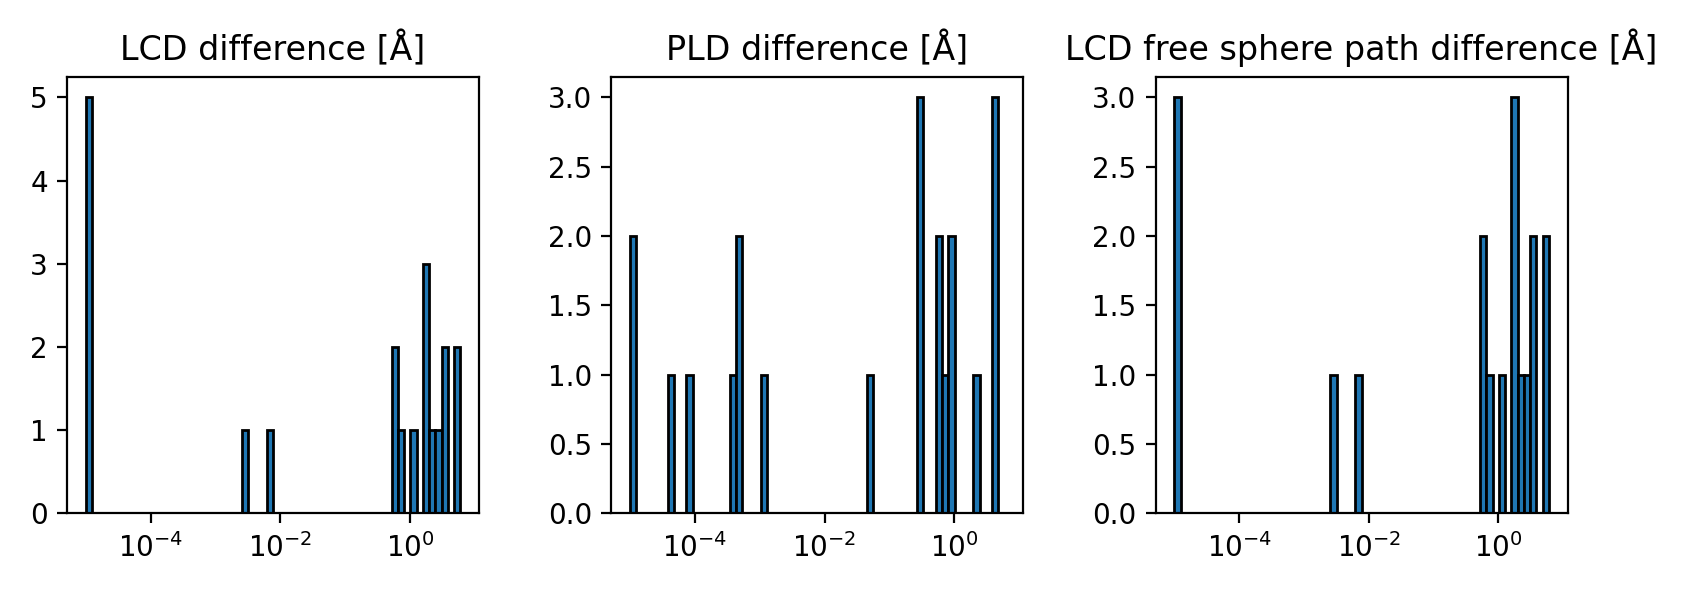

In [14]:
headers = ['LCD difference [Å]', 'PLD difference [Å]', 'LCD free sphere path difference [Å]']
idx = -6

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8.5, 3))
for i, ax in enumerate(axes.flatten()):
    ax.hist(IZA_all[IZA_all.columns[idx + 1]] - IZA_all[IZA_all.columns[idx]], 
            bins=np.logspace(np.log10(a[a > 0].min()), np.log10(6), 61), edgecolor='black')
    ax.set_title(headers[i])
    ax.xaxis.grid(True, which='minor')
    ax.set_xscale('log')
    idx += 2

plt.tight_layout()

<IPython.core.display.Javascript object>


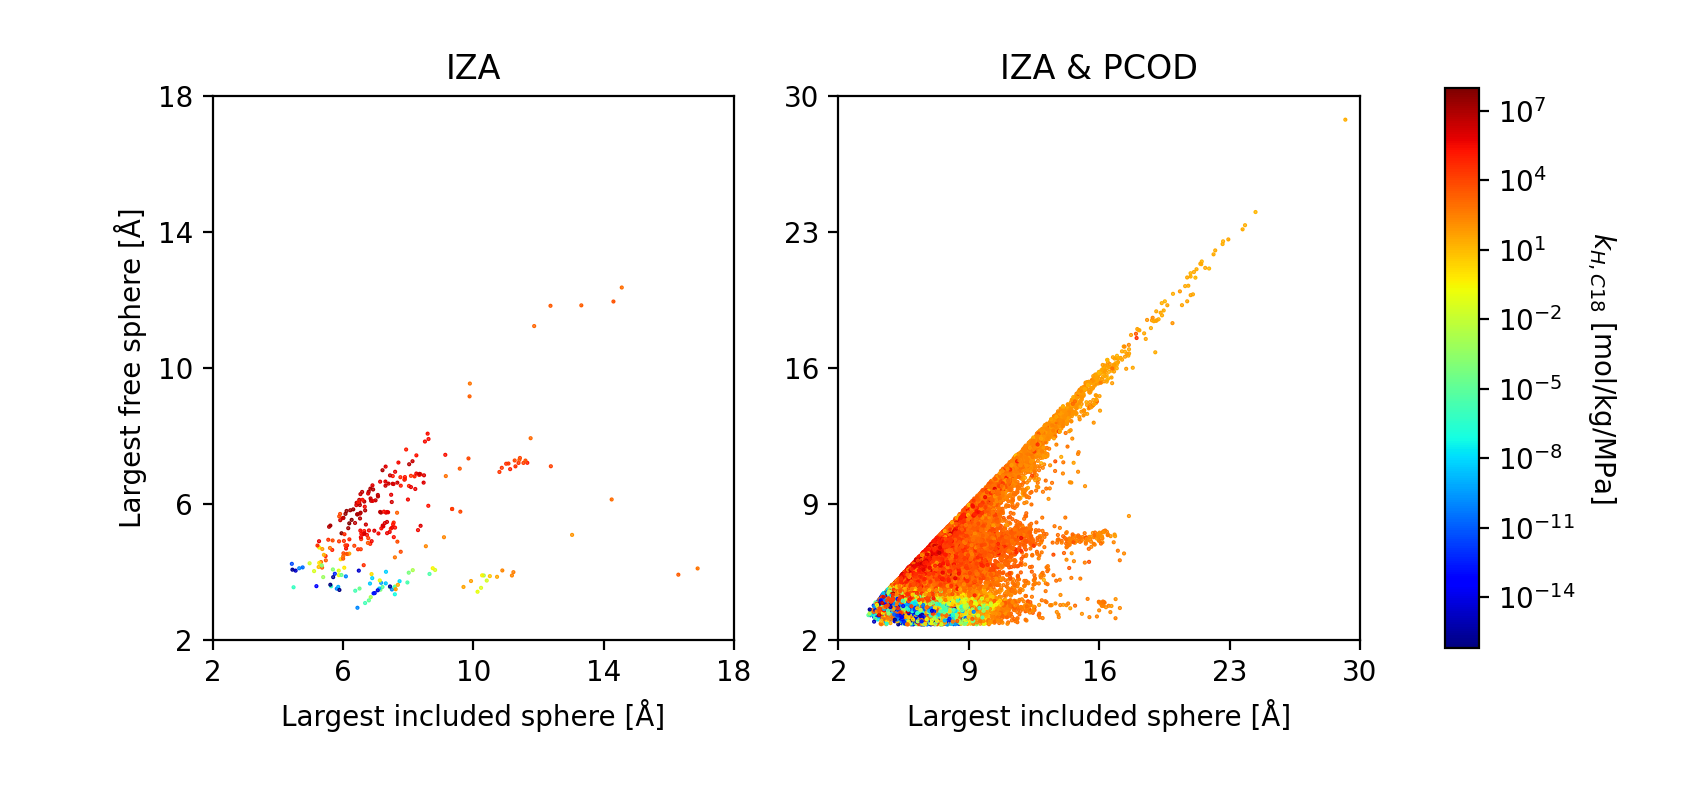

In [15]:
headers = ['IZA', 'IZA & PCOD']
data = [psd_chan, each_zeolite]
vmin = each_zeolite['kH_C18'].min()
vmax = each_zeolite['kH_C18'].max()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8.5, 4))
for i, ax in enumerate(axes.flatten()):
    sct = ax.scatter(data[i]['largest_inc_sphere'], data[i]['largest_free_sphere'], s=1,
                     c=data[i]['kH_C18'], marker='.', cmap='jet', norm=matplotlib.colors.LogNorm())
    
    if i == 0:
        ax.set_title(headers[i])
        ax.set_ylabel('Largest free sphere [Å]')
        ax.axis([2, 18, 2, 18])
        ax.set_xticks(range(2, 19, 4))
        ax.set_yticks(range(2, 19, 4))
    
    if i == 1:
        ax.set_title(headers[i])
        ax.axis([2, 30, 2, 30])
        ax.set_xticks(range(2, 31, 7))
        ax.set_yticks(range(2, 31, 7))
    
    ax.set_xlabel('Largest included sphere [Å]')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.19, 0.02, 0.7])
cbar = fig.colorbar(sct, cax=cbar_ax)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('$k_{H,C18}$ [mol/kg/MPa]', rotation=270)
fig.subplots_adjust(bottom=0.2)

<IPython.core.display.Javascript object>


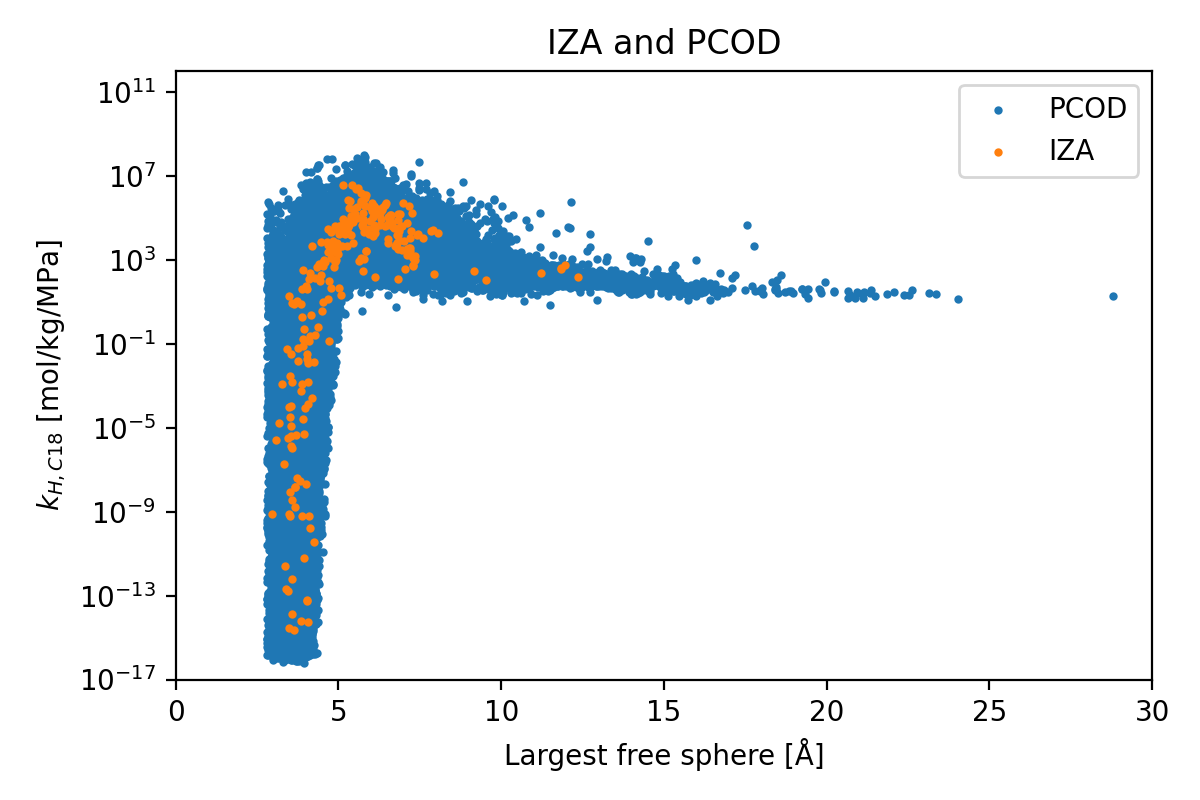

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(each_zeolite.loc[402:, 'largest_free_sphere'], each_zeolite.loc[402:, 'kH_C18'], 
            s=4, label='PCOD')
ax.scatter(each_zeolite.loc[:402, 'largest_free_sphere'], each_zeolite.loc[:402, 'kH_C18'], 
            s=4, label='IZA')
ax.set_title('IZA and PCOD')
ax.set_xlabel('Largest free sphere [Å]')
ax.set_ylabel('$k_{H,C18}$ [mol/kg/MPa]')
ax.set_yscale('log')
ax.axis([0, 30, 1e-17, 1e12])
ax.legend()
fig.tight_layout()

<IPython.core.display.Javascript object>


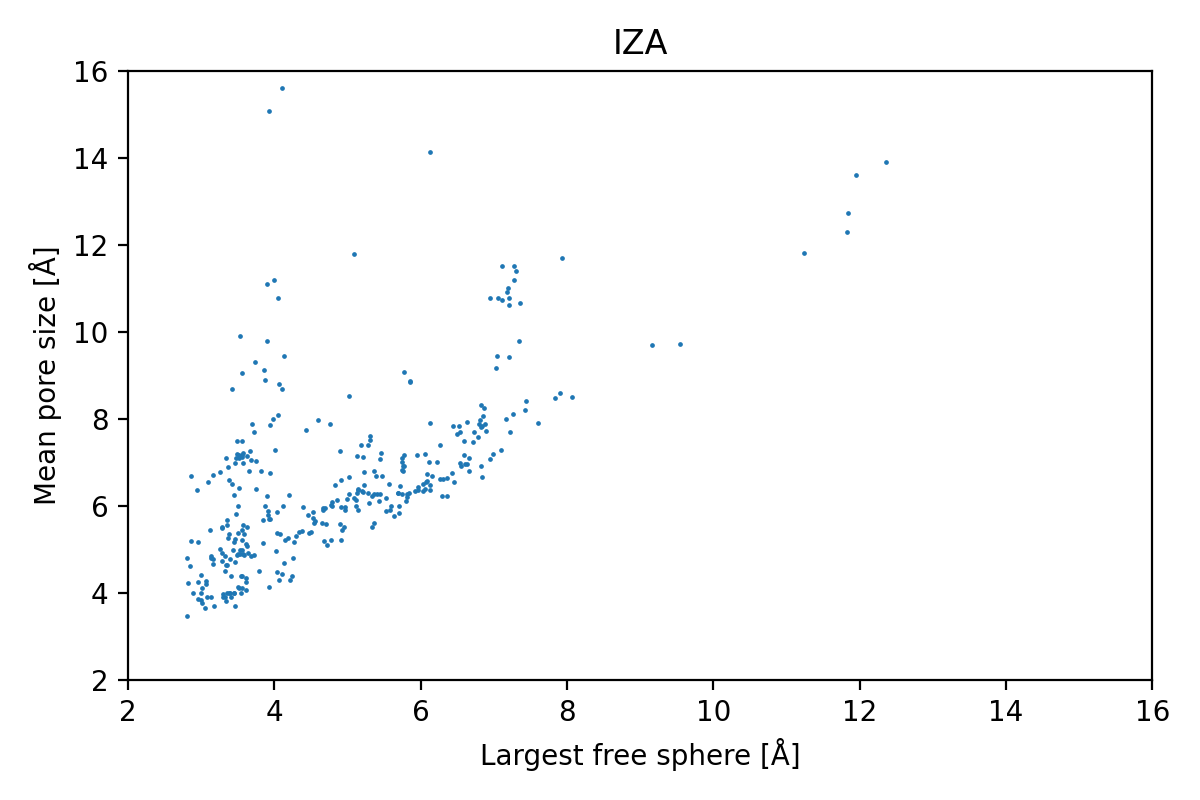

In [17]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(psd_chan['largest_free_sphere'], psd_chan['mean'], s=2, marker='.')
ax.set_title('IZA')
ax.set_xlabel('Largest free sphere [Å]')
ax.set_ylabel('Mean pore size [Å]')
ax.axis([2, 16, 2, 16])
fig.tight_layout()

<IPython.core.display.Javascript object>


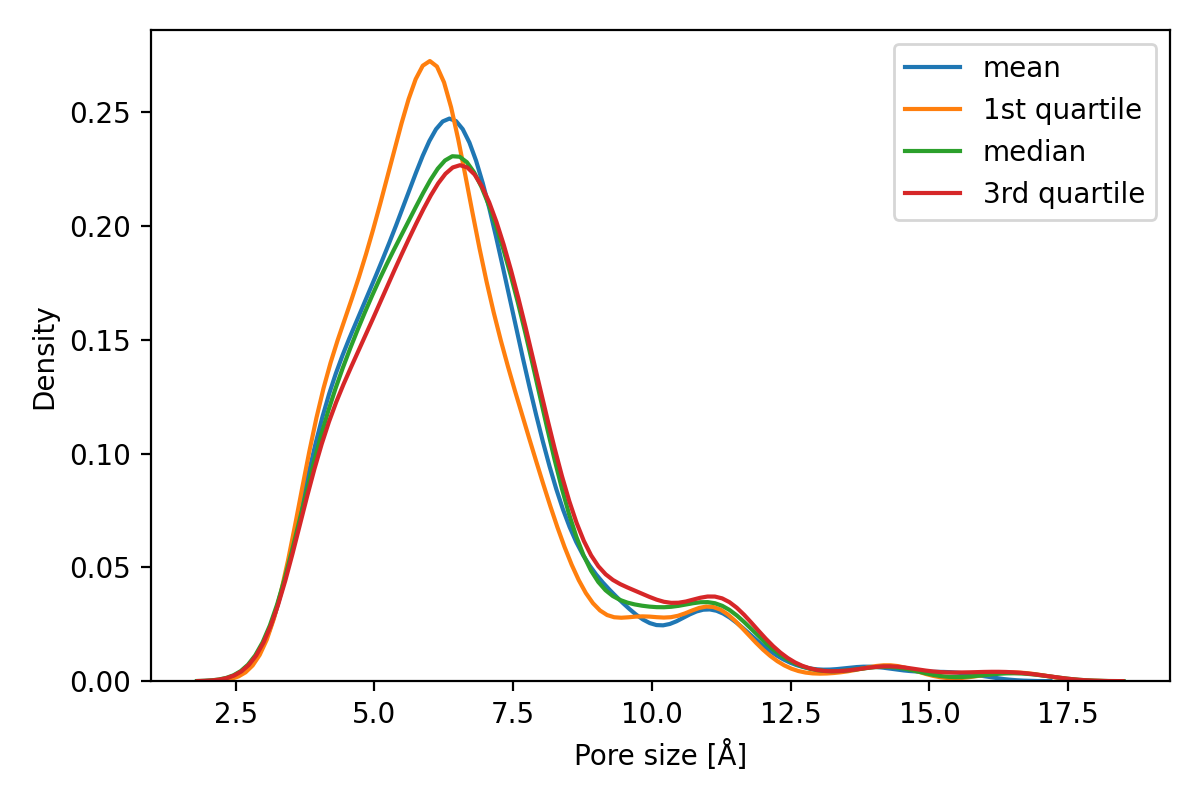

In [18]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.distplot(psd_chan['mean'], bins=50, hist=False, kde=True, label='mean')
sns.distplot(psd_chan['1st_quartile'], bins=50, hist=False, kde=True, label='1st quartile')
sns.distplot(psd_chan['median'], bins=50, hist=False, kde=True, label='median')
sns.distplot(psd_chan['3rd_quartile'], bins=50, hist=False, kde=True, label='3rd quartile')
ax.set_xlabel('Pore size [Å]')
ax.set_ylabel('Density')

fig.tight_layout()

<IPython.core.display.Javascript object>


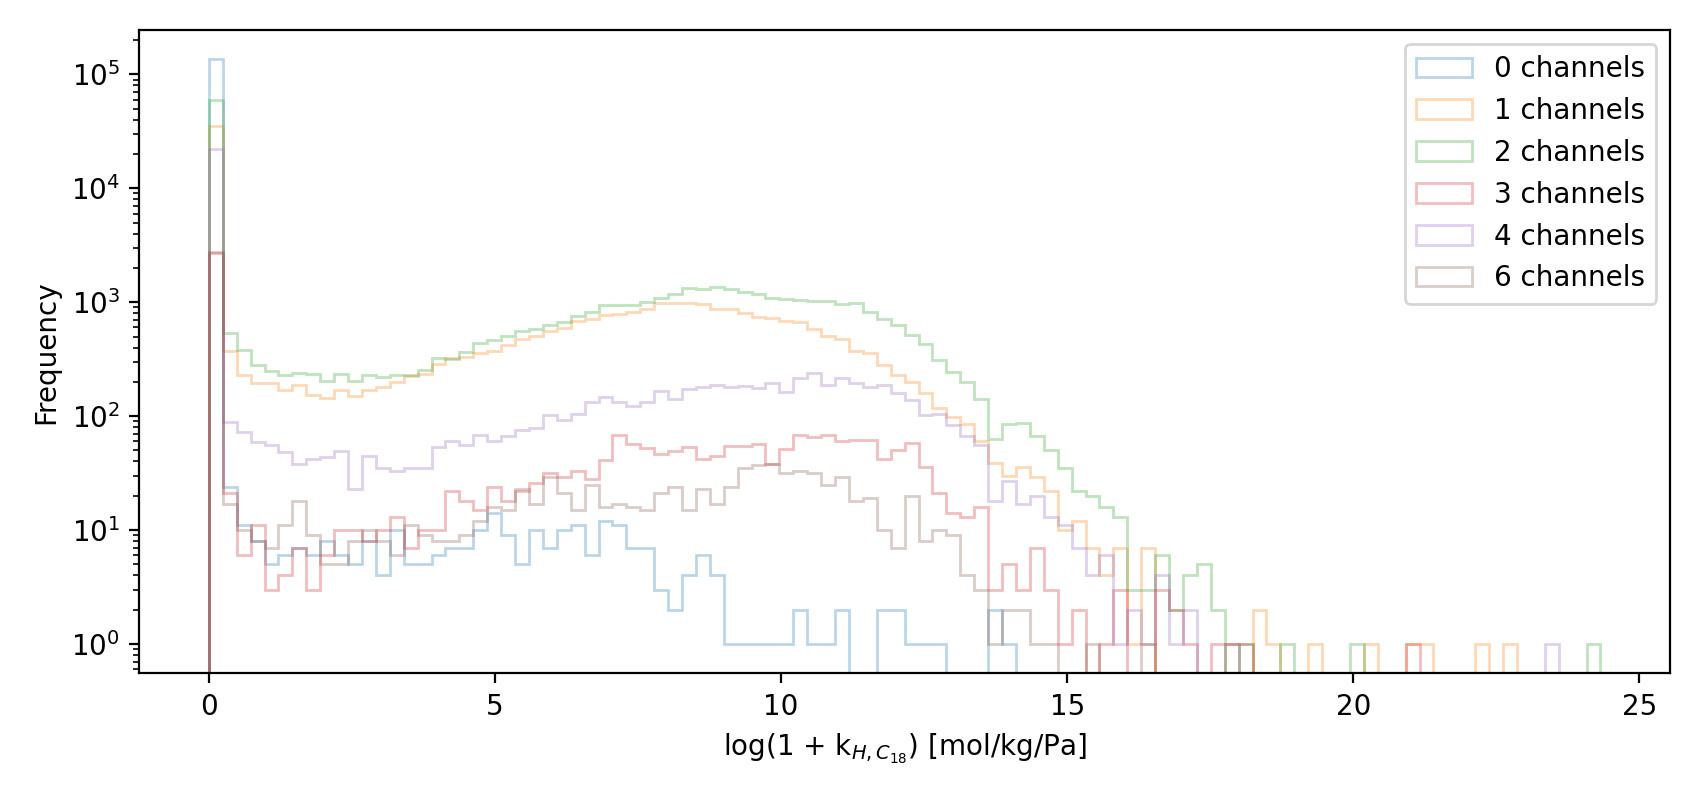

In [17]:
vmin, vmax = each_zeolite.kH_C18.min(), each_zeolite.kH_C18.max()
fig, ax = plt.subplots(figsize=(8.5, 4))

for i in [0, 1, 2, 3, 4, 6]:
    ax.hist(
        np.log1p(each_zeolite.kH_C18[each_zeolite.num_channels == i]), 
        bins=np.linspace(np.log1p(vmin), np.log1p(vmax), 101),
        alpha=0.3, histtype='step',
        label='{} channels'.format(i)
    )

ax.set_xlabel('log(1 + k$_{H,C_{18}}$) [mol/kg/Pa]')
ax.set_ylabel('Frequency')
ax.set_yscale('log')
ax.legend()
fig.tight_layout()

# Further investigation

In [201]:
dtype = {
    'zeolite': str,
    'set': str,
    'U_C18': float,
    'SETE_C18': float,
}

In [3]:
df_full = pd.read_csv('../../data/chemistry-channel-info/each-zeolite-info-FULL.csv', 
                      low_memory=False)
df_full.filter(like='C18')

kH_C18                U_C18    SETE_C18  dim_C18
0       0.000000e+00       505.3769670548  481.227323        1
1       0.000000e+00       798.8761754772  425.469635        1
2       0.000000e+00       291.7543179456  270.706661        3
3       1.738134e-09       -39.3565206512  141.111020        3
4       1.457747e-08       -42.8064146355  156.702076        3
...              ...                  ...         ...      ...
331569  0.000000e+00              10000.0     10000.0        0
331570  0.000000e+00              10000.0     10000.0        0
331571  0.000000e+00              10000.0     10000.0        0
331572  3.334806e+00  -144.72365373620002  290.738392        3
331573  0.000000e+00              10000.0     10000.0        0

[331574 rows x 4 columns]

In [4]:
df_full[['zeolite', 'kH_C18', 'U_C18', 'SETE_C18', 'dim_C18', 'num_channels']].head(20)

zeolite        kH_C18            U_C18    SETE_C18  dim_C18  num_channels
0    ABW-0  0.000000e+00   505.3769670548  481.227323        1             2
1    ABW-1  0.000000e+00   798.8761754772  425.469635        1             2
2    ACO-0  0.000000e+00   291.7543179456  270.706661        3             1
3    AEI-0  1.738134e-09   -39.3565206512  141.111020        3             1
4    AEI-1  1.457747e-08   -42.8064146355  156.702076        3             1
5    AEL-0  6.660187e+03  -210.9721183199  440.031230        2             2
6    AEL-1  2.285502e+00  -194.4360275836  442.213833        1             2
7    AEL-2  4.543253e+02  -192.7640707370  445.400906        2             2
8    AEN-0  0.000000e+00   443.1237524177  273.198300        2             2
9    AEN-1  0.000000e+00              NaN         NaN        0             4
10   AET-0  1.418173e+04  -111.2915914141  318.928447        3             2
11   AET-1  1.861719e+04  -105.7946889999  286.025765        3             2
12   AFG-0  0.000000e+00   742.3549693036  107.065931        3             0
13   AFG-1  0.000000e+00              NaN         NaN        0             0
14   AFI-0  1.674523e+05  -129.4107760216  345.598427        3             1
15   AFI-1  3.587101e+05  -134.3486845108  341.442828        3             1
16   AFN-0  0.000000e+00   106.8138475781  312.758472        2             2
17   AFO-0  3.802377e+04  -194.5042859917  445.774348        1             2
18   AFO-1  1.380008e+02  -206.9615527185  462.675927        1             1
19   AFR-0  6.377557e+03  -110.1152738710  290.053241        3             2

In [5]:
# convert kH_C18 from mol/kg/MPa to mol/kg/Pa
df_full['kH_C18'] = df_full['kH_C18'] / 1e6

In [6]:
type(df_full.loc[28, 'U_C18'])  # string 'NAN', not an actual NaN

str

In [7]:
df_full['U_C18'].replace('NAN', np.nan)

0              505.3769670548
1              798.8761754772
2              291.7543179456
3              -39.3565206512
4              -42.8064146355
                 ...         
331569                10000.0
331570                10000.0
331571                10000.0
331572    -144.72365373620002
331573                10000.0
Name: U_C18, Length: 331574, dtype: object

In [8]:
df_full = df_full.replace('NAN', np.nan)  # replace str NAN with actual NaN

In [9]:
# It appears that dim_C18 = 0 then kH_C18 = 0 (not necessarily the other way around).
# Makes sense since if C18 doesn't have a dimensionality (i.e. doesn't exist in zeolite)
#     then kH_C18 = 0.
df_full.kH_C18[df_full.dim_C18 == 0].describe()

count    160485.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: kH_C18, dtype: float64

In [10]:
type(df_full.loc[9, 'U_C18'])  # actual NaN

float

In [11]:
df_full.U_C18[(df_full.dim_C18 == 0) & (df_full.U_C18.notna())]

402       10000.0
403       10000.0
404       10000.0
405       10000.0
406       10000.0
           ...   
331568    10000.0
331569    10000.0
331570    10000.0
331571    10000.0
331573    10000.0
Name: U_C18, Length: 160428, dtype: object

In [12]:
type(df_full.loc[331569, 'U_C18'])

str

In [13]:
# if U = 10,000.0 then dim_C18 = 0
df_full.dim_C18[df_full.U_C18 == 10000.0].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: dim_C18, dtype: float64

In [14]:
# change U_C18 dtype from str to float
df_full['U_C18'] = df_full['U_C18'].astype(float)

<IPython.core.display.Javascript object>


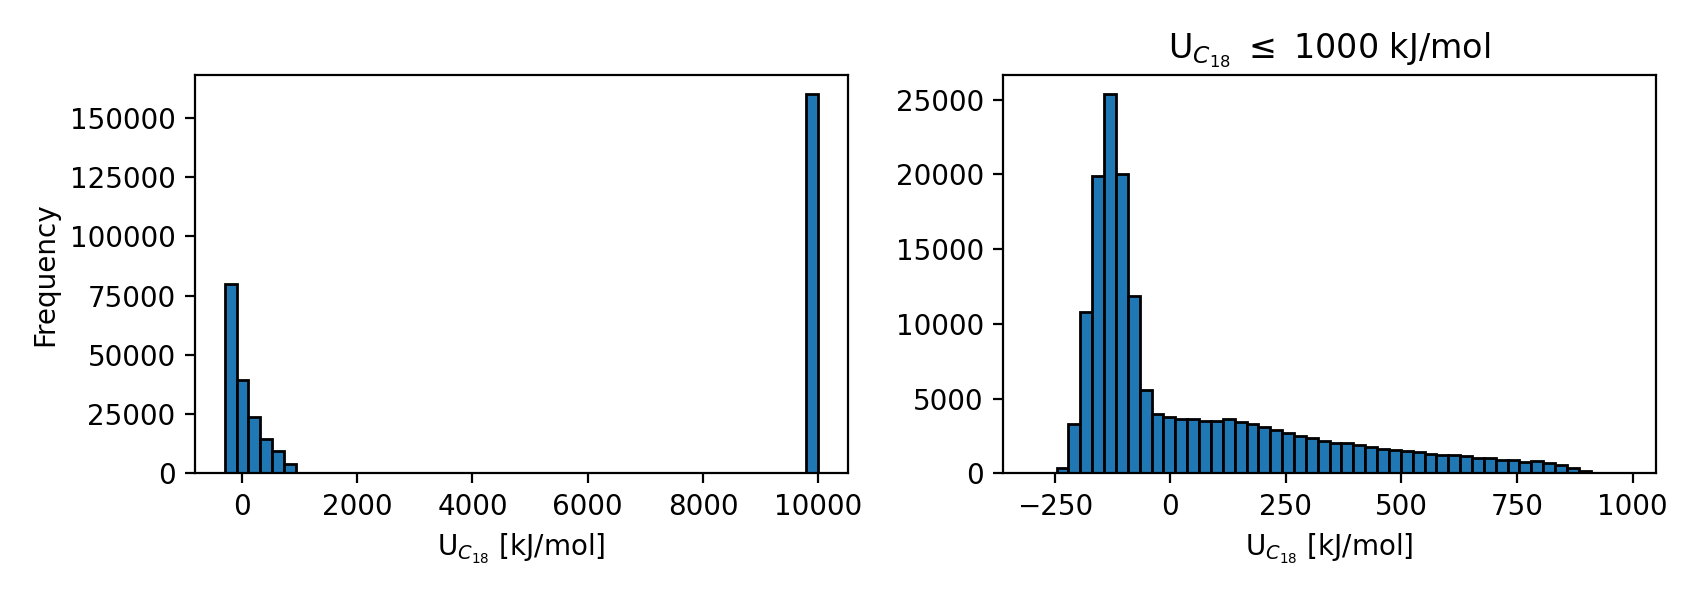

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8.5, 3))

axes[0].hist(df_full.U_C18[df_full.U_C18.notna()], 
             bins=50, edgecolor='black')
axes[0].set_xlabel('U$_{C_{18}}$ [kJ/mol]')
axes[0].set_ylabel('Frequency')

axes[1].hist(df_full.U_C18[(df_full.U_C18.notna()) & (df_full.U_C18 != 10000.0)], 
             bins=50, edgecolor='black')
axes[1].set_xlabel('U$_{C_{18}}$ [kJ/mol]')
axes[1].set_title('U$_{C_{18}}$ $\leq$ 1000 kJ/mol')

plt.tight_layout()

In [23]:
# change SETE_C18 dtype from str to float
df_full['SETE_C18'] = df_full['SETE_C18'].astype(float)

In [24]:
df_full.SETE_C18.describe()

count    331517.000000
mean       5017.160855
std        4821.390971
min           6.635668
25%         364.874207
50%         480.447494
75%       10000.000000
max       10000.000000
Name: SETE_C18, dtype: float64

<IPython.core.display.Javascript object>


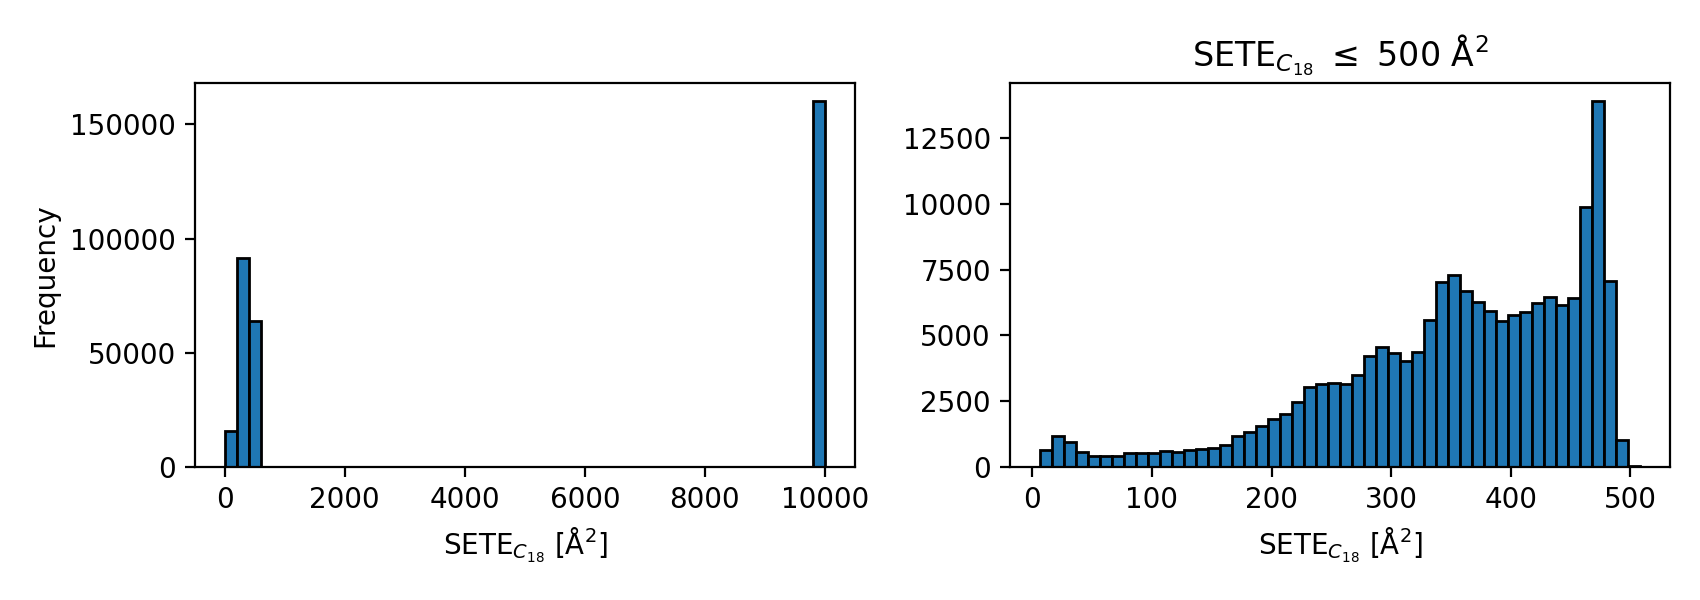

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8.5, 3))

axes[0].hist(df_full.SETE_C18[df_full.SETE_C18.notna()], 
             bins=50, edgecolor='black')
axes[0].set_xlabel('SETE$_{C_{18}}$ [Å$^{2}$]')
axes[0].set_ylabel('Frequency')

axes[1].hist(df_full.SETE_C18[(df_full.SETE_C18.notna()) & (df_full.SETE_C18 != 10000.0)], 
             bins=50, edgecolor='black')
axes[1].set_xlabel('SETE$_{C_{18}}$ [Å$^{2}$]')
axes[1].set_title('SETE$_{C_{18}}$ $\leq$ 500 Å$^{2}$')

plt.tight_layout()

In [26]:
# investigate why SETE_C18 has so many 10,000 instances
df_full[df_full.SETE_C18 == 10000.0].filter(like='C18').describe()
# when SETE_C18 = 10,000 -- dim_C18, kH_C18 = 0 and U_C18 = 0 
# (i.e. these values indicate when C18s don't adsorb)

kH_C18     U_C18  SETE_C18   dim_C18
count  160280.0  160280.0  160280.0  160280.0
mean        0.0   10000.0   10000.0       0.0
std         0.0       0.0       0.0       0.0
min         0.0   10000.0   10000.0       0.0
25%         0.0   10000.0   10000.0       0.0
50%         0.0   10000.0   10000.0       0.0
75%         0.0   10000.0   10000.0       0.0
max         0.0   10000.0   10000.0       0.0

Question: What is the proper way of handling these entries where C18 doesn't adsorb?

Proper value for:

1.) kH_C18? **0 is correct.**

2.) U_C18? **U_C18 seems to be ??? and skeptical if 10,000.0 is proper value.**

3.) SETE_C18? **SETE is the Squared End-To-End distance (in Å^2) so 10,000.0 does not seem proper.**

4.) dim_C18? **0 is correct.**

In [27]:
# there are no instances of SETE_C18 = 0, possible replacement for 10,000.0
df_full[df_full.SETE_C18 == 0.0]

Empty DataFrame
Columns: [zeolite, set, kH_C18, kH_C24, kH_C30, kH_2C17, kH_4C17, kH_22C16, U_C18, U_C24, U_C30, U_2C17, U_4C17, U_22C16, SETE_C18, SETE_C24, SETE_C30, SETE_2C17, SETE_4C17, SETE_22C16, dim_C18, dim_C24, dim_C30, dim_2C17, dim_4C17, dim_22C16, geometrical_dimension, LCD_min, LCD_max, PLD_min, PLD_max, LCD_free_min, LCD_free_max, num_channels, dimensionality, largest_inc_sphere, largest_free_sphere, largest_inc_sphere_free_path]
Index: []

[0 rows x 38 columns]

In [28]:
# there are no instances of U_C18 = 0, possible replacement for 10,000.0
df_full[df_full.U_C18 == 0.0]

Empty DataFrame
Columns: [zeolite, set, kH_C18, kH_C24, kH_C30, kH_2C17, kH_4C17, kH_22C16, U_C18, U_C24, U_C30, U_2C17, U_4C17, U_22C16, SETE_C18, SETE_C24, SETE_C30, SETE_2C17, SETE_4C17, SETE_22C16, dim_C18, dim_C24, dim_C30, dim_2C17, dim_4C17, dim_22C16, geometrical_dimension, LCD_min, LCD_max, PLD_min, PLD_max, LCD_free_min, LCD_free_max, num_channels, dimensionality, largest_inc_sphere, largest_free_sphere, largest_inc_sphere_free_path]
Index: []

[0 rows x 38 columns]

<IPython.core.display.Javascript object>


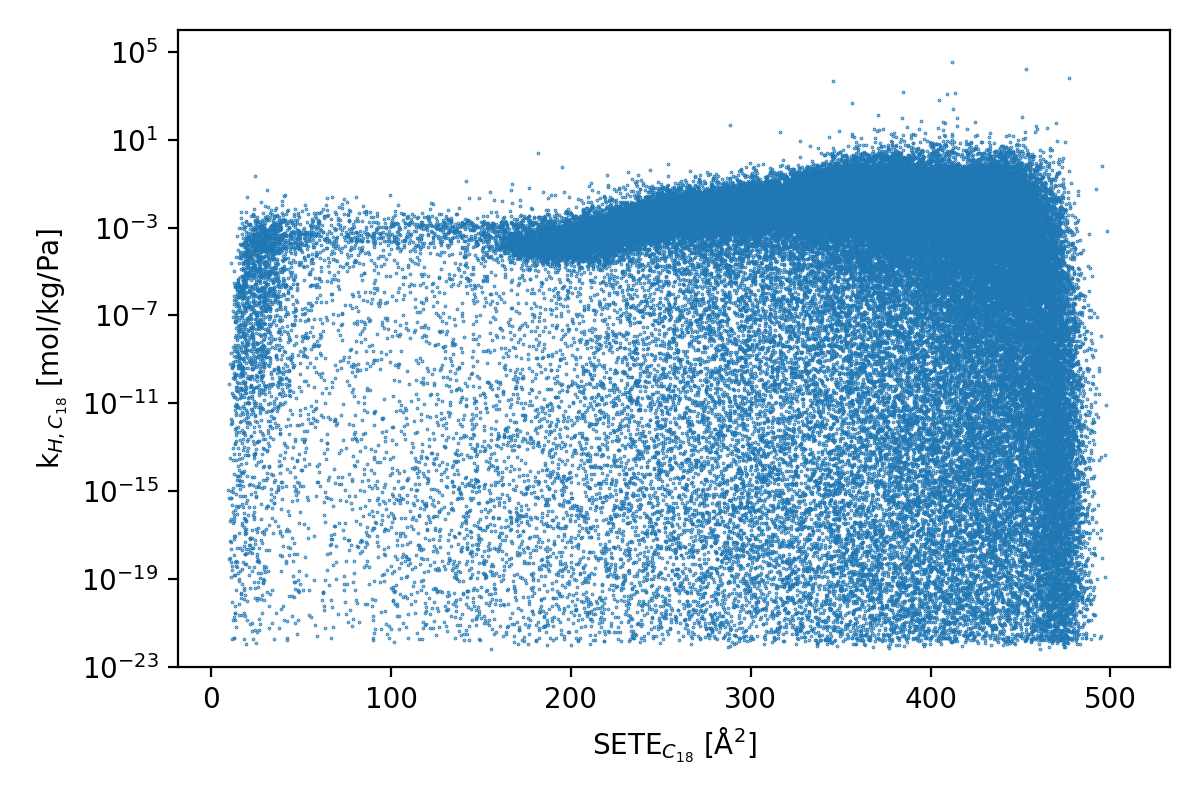

In [29]:
fix, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.scatter(df_full.SETE_C18[(df_full.SETE_C18.notna()) & (df_full.SETE_C18 != 10000.0)], 
           df_full.kH_C18[(df_full.SETE_C18.notna()) & (df_full.SETE_C18 != 10000.0)], s=0.1)
ax.set_xlabel('SETE$_{C_{18}}$ [Å$^{2}$]')
ax.set_ylabel('k$_{H,C_{18}}$ [mol/kg/Pa]')
ax.set_yscale('log')
ax.set_ylim(1e-23, 1e6)
plt.tight_layout()

<IPython.core.display.Javascript object>


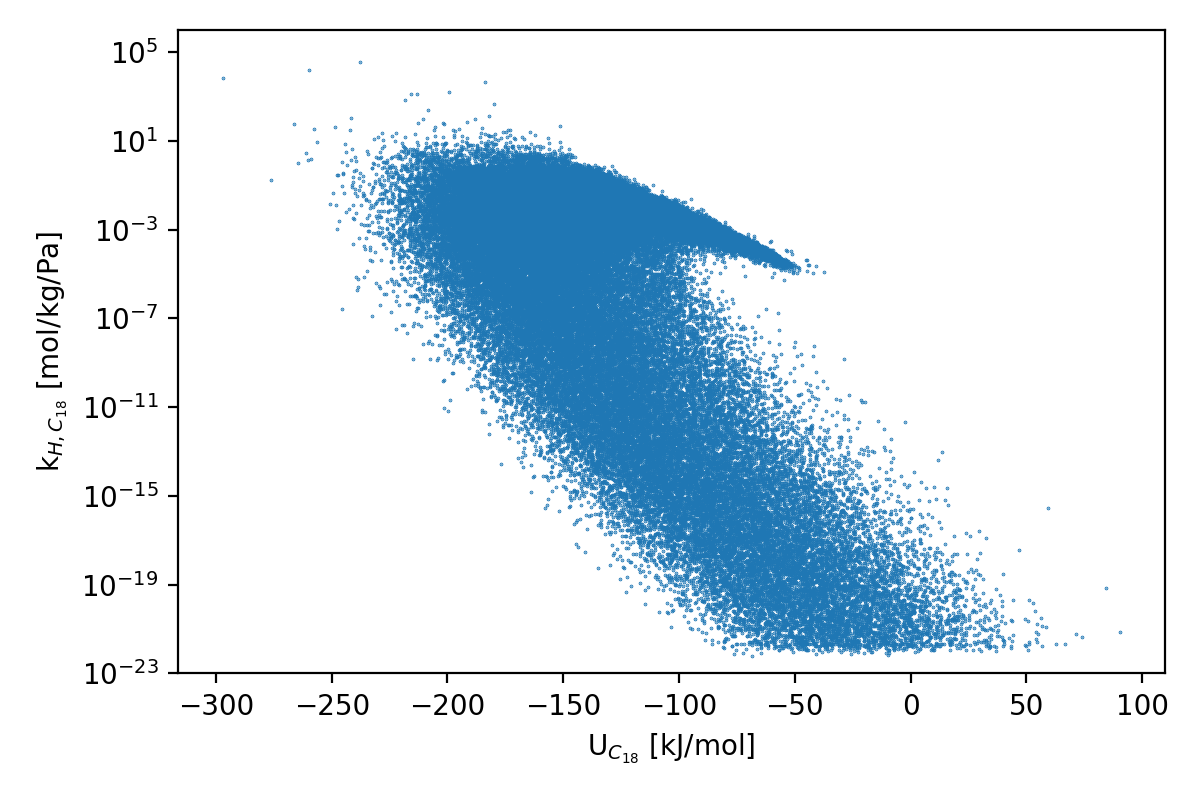

In [31]:
fix, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.scatter(df_full.U_C18[(df_full.U_C18.notna()) & (df_full.U_C18 != 10000.0) & (df_full.kH_C18 != 0)],
           df_full.kH_C18[(df_full.U_C18.notna()) & (df_full.U_C18 != 10000.0) & (df_full.kH_C18 != 0)], s=0.1)
ax.set_xlabel('U$_{C_{18}}$ [kJ/mol]')
ax.set_ylabel('k$_{H,C_{18}}$ [mol/kg/Pa]')
ax.set_yscale('log')
ax.set_ylim(1e-23, 1e6)
plt.tight_layout()

Based on two previous plots, it might not be a good idea to set non-adsorbing U_C18 to 0 but SETE_C18 might be okay. If I drop non-adsorbing U_C18 entries, no use in resetting SETE_C18. Will try setting non-adsorbing U_C18 to 10,000.

In [32]:
df_full[df_full.SETE_C18.isna()].index == df_full[df_full.SETE_C18.isna()].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [33]:
df_full['SETE_C18'] = df_full['SETE_C18'].replace(np.nan, 0)
df_full['SETE_C18'] = df_full['SETE_C18'].replace(10000, 0)
df_full.SETE_C18.describe()

count    331574.000000
mean        182.384974
std         192.151924
min           0.000000
25%           0.000000
50%          94.463078
75%         373.571742
max         508.018792
Name: SETE_C18, dtype: float64

In [34]:
df_full['U_C18'] = df_full['U_C18'].replace(np.nan, 10000.0)
df_full.U_C18.describe()

count    331574.000000
mean       4861.293530
std        4975.928181
min        -296.983288
25%         -86.337167
50%         696.834824
75%       10000.000000
max       10000.000000
Name: U_C18, dtype: float64

In [35]:
df_full['geometrical_dimension'] = df_full['geometrical_dimension'].replace(np.nan, 0)
df_full['LCD_min'] = df_full['LCD_min'].replace(np.nan, 0)
df_full['LCD_max'] = df_full['LCD_max'].replace(np.nan, 0)
df_full['PLD_min'] = df_full['PLD_min'].replace(np.nan, 0)
df_full['PLD_max'] = df_full['PLD_max'].replace(np.nan, 0)
df_full['LCD_free_min'] = df_full['LCD_free_min'].replace(np.nan, 0)
df_full['LCD_free_max'] = df_full['LCD_free_max'].replace(np.nan, 0)

In [36]:
feature_cols = ['kH_C18', 'U_C18', 'SETE_C18', 'dim_C18', 'geometrical_dimension', 'num_channels',
                'LCD_min', 'LCD_max', 'PLD_min', 'PLD_max', 'LCD_free_min', 'LCD_free_max']
to_keep = df_full[feature_cols]
to_keep = to_keep[to_keep.dim_C18 != 0]
to_keep

kH_C18       U_C18    SETE_C18  dim_C18  geometrical_dimension  \
0       0.000000e+00  505.376967  481.227323        1                    1.0   
1       0.000000e+00  798.876175  425.469635        1                    1.0   
2       0.000000e+00  291.754318  270.706661        3                    3.0   
3       1.738134e-15  -39.356521  141.111020        3                    3.0   
4       1.457747e-14  -42.806415  156.702076        3                    3.0   
...              ...         ...         ...      ...                    ...   
331562  6.119182e-12  -31.803883   35.180627        3                    0.0   
331563  4.083667e-11  -78.699431  139.018049        3                    3.0   
331564  7.924689e-05  -71.840573  128.047097        3                    3.0   
331565  9.296409e-05  -70.553838  142.195420        3                    0.0   
331572  3.334806e-06 -144.723654  290.738392        3                    3.0   

        num_channels   LCD_min   LCD_max  PLD_min  PLD_max  LCD_free_min  \
0                  2   4.08290   4.08290  3.34747  3.34747       4.08290   
1                  2   3.81867   3.81867  3.34501  3.34501       3.81867   
2                  1   4.41809   4.41809  3.40354  3.40354       4.41809   
3                  1   7.17261   7.17261  3.68131  3.68131       7.17261   
4                  1   7.31458   7.31458  3.66592  3.66592       7.31458   
...              ...       ...       ...      ...      ...           ...   
331562             0   0.00000   0.00000  0.00000  0.00000       0.00000   
331563             2   9.99381   9.99381  3.64882  3.64882       9.99381   
331564             2  16.65820  16.65820  3.75074  3.75074      16.65820   
331565             0   0.00000   0.00000  0.00000  0.00000       0.00000   
331572             1   5.98227   5.98227  4.33340  4.33340       5.98227   

        LCD_free_max  
0            4.08290  
1            3.81867  
2            4.41809  
3            7.17261  
4            7.31458  
...              ...  
331562       0.00000  
331563       9.99381  
331564      16.65820  
331565       0.00000  
331572       5.98227  

[171089 rows x 12 columns]

In [37]:
# check if any NaN values remain
to_keep.isna().values.any()

False

<IPython.core.display.Javascript object>


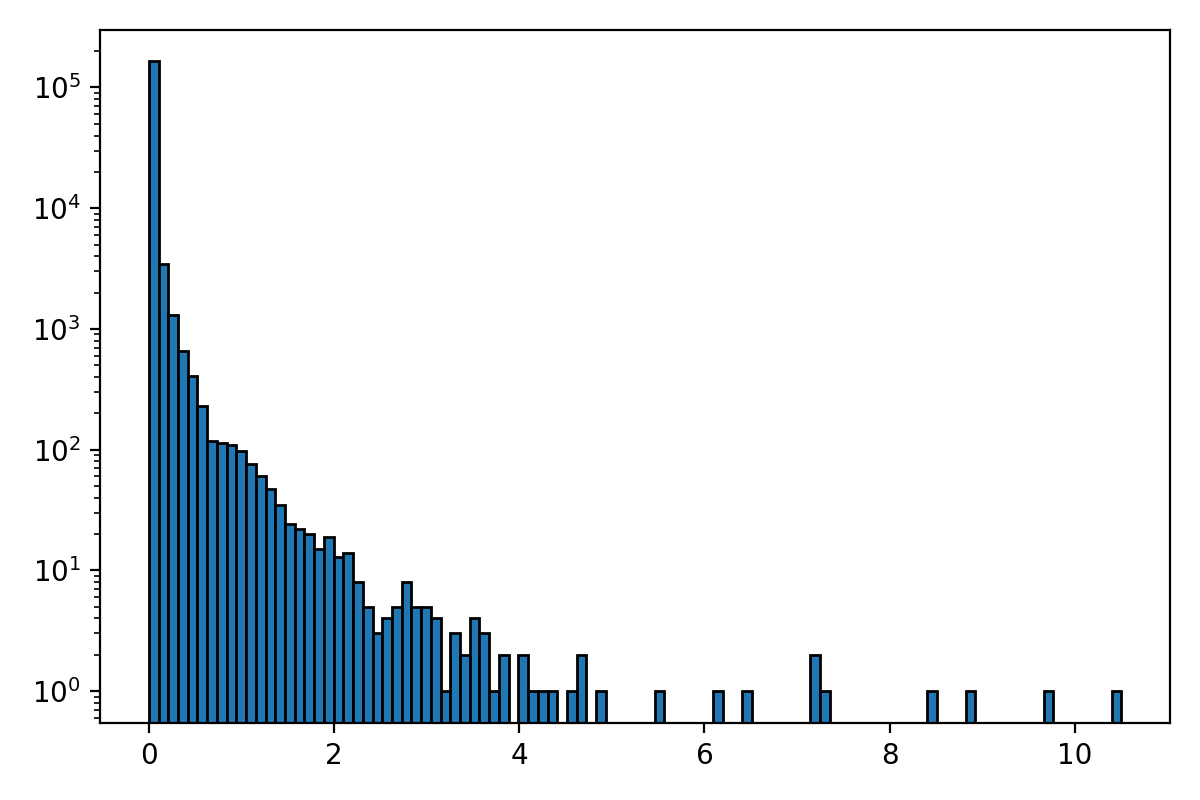

In [197]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.hist(np.log1p(to_keep.kH_C18), bins=100, edgecolor='black')
ax.set_yscale('log')
plt.tight_layout()

In [104]:
to_keep[to_keep.kH_C18 == 0].count()

kH_C18                   70568
U_C18                    70568
SETE_C18                 70568
dim_C18                  70568
geometrical_dimension    70568
num_channels             70568
LCD_min                  70568
LCD_max                  70568
PLD_min                  70568
PLD_max                  70568
LCD_free_min             70568
LCD_free_max             70568
dtype: int64

In [105]:
70568 / 171089

0.4124636884896165

In [153]:
df_full[df_full.kH_C18 != 0].describe().filter(like='D_')

LCD_min        LCD_max        PLD_min        PLD_max  \
count  100521.000000  100521.000000  100521.000000  100521.000000   
mean        6.521833       6.839892       5.125917       5.451674   
std         1.889926       1.932998       1.864843       1.928295   
min         0.000000       0.000000       0.000000       0.000000   
25%         5.309140       5.573280       3.876270       4.125730   
50%         6.168240       6.444600       4.695350       4.973120   
75%         7.438480       7.743670       6.036980       6.373750   
max        29.212900      29.212900      28.782100      28.782100   

        LCD_free_min   LCD_free_max  
count  100521.000000  100521.000000  
mean        6.513252       6.831085  
std         1.888949       1.933043  
min         0.000000       0.000000  
25%         5.300510       5.564930  
50%         6.158820       6.434640  
75%         7.429770       7.736300  
max        29.212900      29.212900

In [161]:
df_full.loc[df_full.kH_C18 != 0, 'PLD_min']

3         3.68131
4         3.66592
5         4.46995
6         4.14771
7         4.34294
           ...   
331562    0.00000
331563    3.64882
331564    3.75074
331565    0.00000
331572    4.33340
Name: PLD_min, Length: 100521, dtype: float64

In [105]:
df_full[(df_full.kH_C18 != 0) & (df_full.num_channels == 0) & (df_full.dim_C18 != 0)]

zeolite   set        kH_C18      kH_C24        kH_C30       kH_2C17  \
143       GIU-0   IZA  1.540636e-13    0.000000  0.000000e+00  2.661106e-09   
144       GIU-1   IZA  8.748287e-12    0.000000  0.000000e+00  8.323896e-04   
217       LTN-0   IZA  9.271142e-06    0.000005  3.521300e-16  6.410497e+00   
218       LTN-1   IZA  1.465572e-05    0.000115  8.120891e-12  8.543022e+00   
247       MSO-0   IZA  5.148604e-15    0.000000  0.000000e+00  2.038400e-06   
...         ...   ...           ...         ...           ...           ...   
331539  8331138  PCOD  9.197046e-18    0.000000  0.000000e+00  1.271247e-14   
331549  8331148  PCOD  2.203563e-15    0.000000  0.000000e+00  1.439643e-08   
331559  8331158  PCOD  1.056417e-15    0.000000  0.000000e+00  1.914013e-09   
331562  8331161  PCOD  6.119182e-12    0.000000  0.000000e+00  3.539203e-06   
331565  8331164  PCOD  9.296409e-05  925.191698  1.045916e+04  1.259996e+02   

             kH_4C17      kH_22C16       U_C18            U_C24  ... LCD_max  \
143     1.883813e-07  5.777642e-04  -62.007646              NaN  ...     0.0   
144     1.595168e-03  2.839138e-02  -87.938324              NaN  ...     0.0   
217     5.859535e+00  3.539631e+00 -128.591782  -121.5815275464  ...     0.0   
218     6.794407e+00  4.996793e+00 -104.818035  -102.9061297942  ...     0.0   
247     1.091533e-09  1.425386e-05  -87.445533              NaN  ...     0.0   
...              ...           ...         ...              ...  ...     ...   
331539  1.929986e-13  2.379978e-11  -50.274624   542.5796735252  ...     0.0   
331549  4.669774e-07  4.720236e-09  -76.273956   181.7262148906  ...     0.0   
331559  1.011161e-06  2.644383e-08  -43.236243    33.6160745052  ...     0.0   
331562  1.615708e-07  3.990238e-09  -31.803883    33.2042966125  ...     0.0   
331565  1.485437e+02  1.541550e+02  -70.553838   -92.2743955951  ...     0.0   

       PLD_min PLD_max LCD_free_min  LCD_free_max num_channels dimensionality  \
143        0.0     0.0          0.0           0.0            0            0.0   
144        0.0     0.0          0.0           0.0            0            0.0   
217        0.0     0.0          0.0           0.0            0            0.0   
218        0.0     0.0          0.0           0.0            0            0.0   
247        0.0     0.0          0.0           0.0            0            0.0   
...        ...     ...          ...           ...          ...            ...   
331539     0.0     0.0          0.0           0.0            0            0.0   
331549     0.0     0.0          0.0           0.0            0            0.0   
331559     0.0     0.0          0.0           0.0            0            0.0   
331562     0.0     0.0          0.0           0.0            0            0.0   
331565     0.0     0.0          0.0           0.0            0            0.0   

       largest_inc_sphere largest_free_sphere largest_inc_sphere_free_path  
143                   0.0                 0.0                          0.0  
144                   0.0                 0.0                          0.0  
217                   0.0                 0.0                          0.0  
218                   0.0                 0.0                          0.0  
247                   0.0                 0.0                          0.0  
...                   ...                 ...                          ...  
331539                0.0                 0.0                          0.0  
331549                0.0                 0.0                          0.0  
331559                0.0                 0.0                          0.0  
331562                0.0                 0.0                          0.0  
331565                0.0                 0.0                          0.0  

[823 rows x 38 columns]

In [102]:
no_0_kH_C18 = df_full.loc[df_full.kH_C18 != 0, feature_cols]
no_0_kH_C18

count    100521.000000
mean          1.973916
std           1.175310
min           0.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          16.000000
Name: num_channels, dtype: float64

In [47]:
to_keep.to_csv('../data/chemistry-channel-info/to_keep.csv', index=False)

In [180]:
no_0_kH_C18.to_csv('../data/chemistry-channel-info/no-0-kH_C18.csv', index=False)

In [46]:
# check if any NaN values remain
to_keep.isna().values.any()

False

<IPython.core.display.Javascript object>


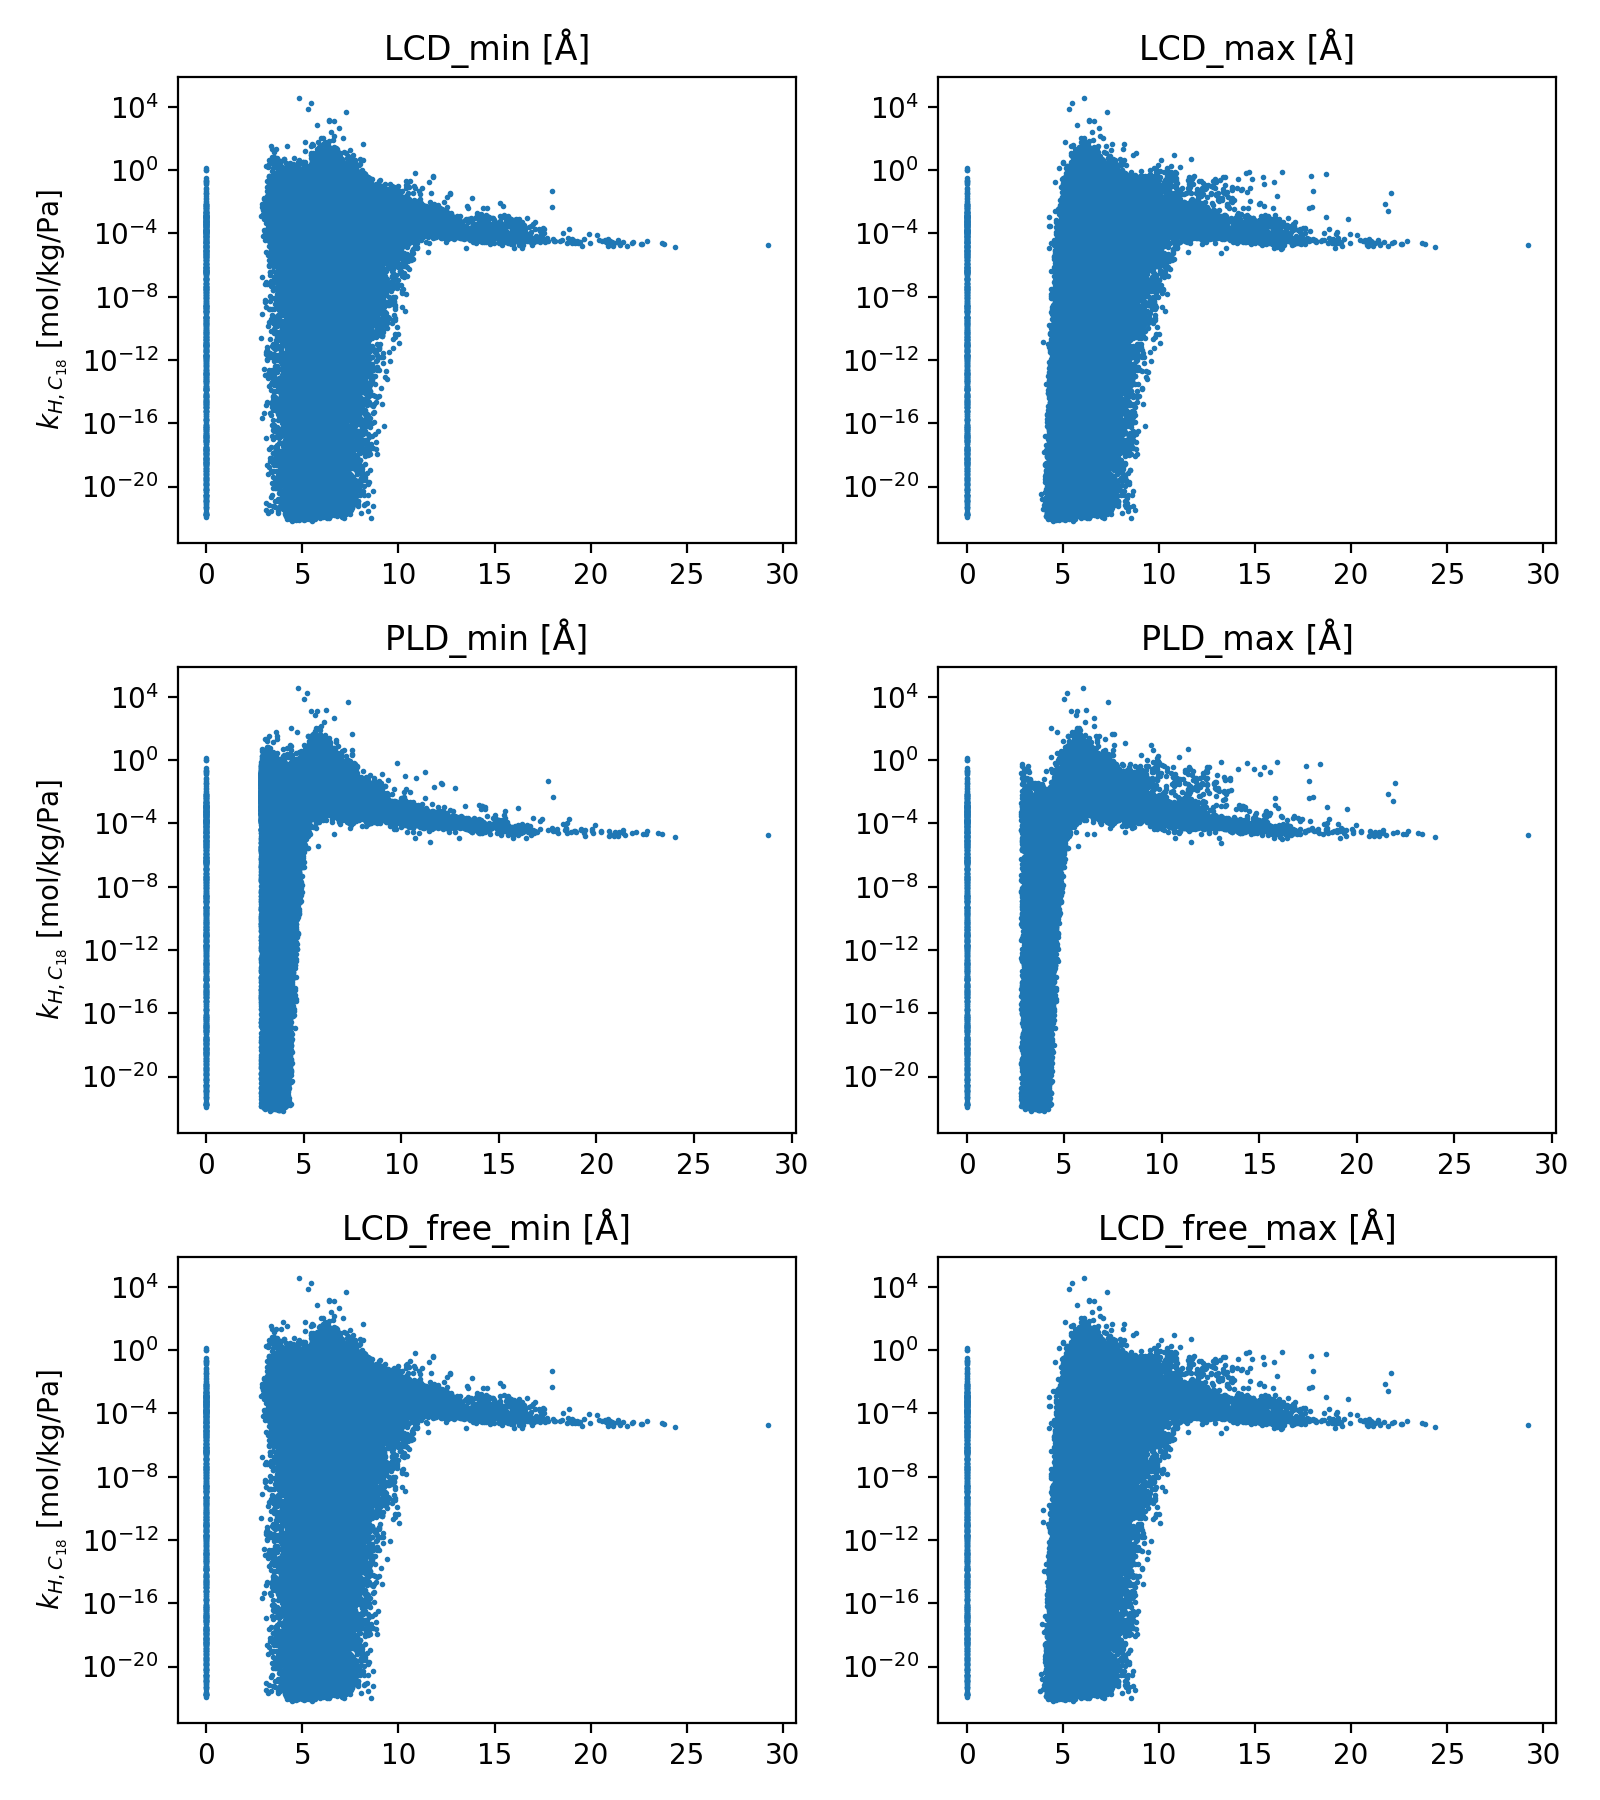

In [182]:
headers = ['LCD_min', 'LCD_max', 'PLD_min', 'PLD_max', 'LCD_free_min', 'LCD_free_max']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 9))
for i, ax in enumerate(axes.flatten()):
    ax.scatter(no_0_kH_C18[headers[i]], 
               no_0_kH_C18.kH_C18, s=1)
    ax.set_title(headers[i] + ' [Å]')
    if i % 2 == 0:
        ax.set_ylabel('$k_{H,C_{18}}$ [mol/kg/Pa]')
    ax.set_yscale('log')
plt.tight_layout()

<IPython.core.display.Javascript object>


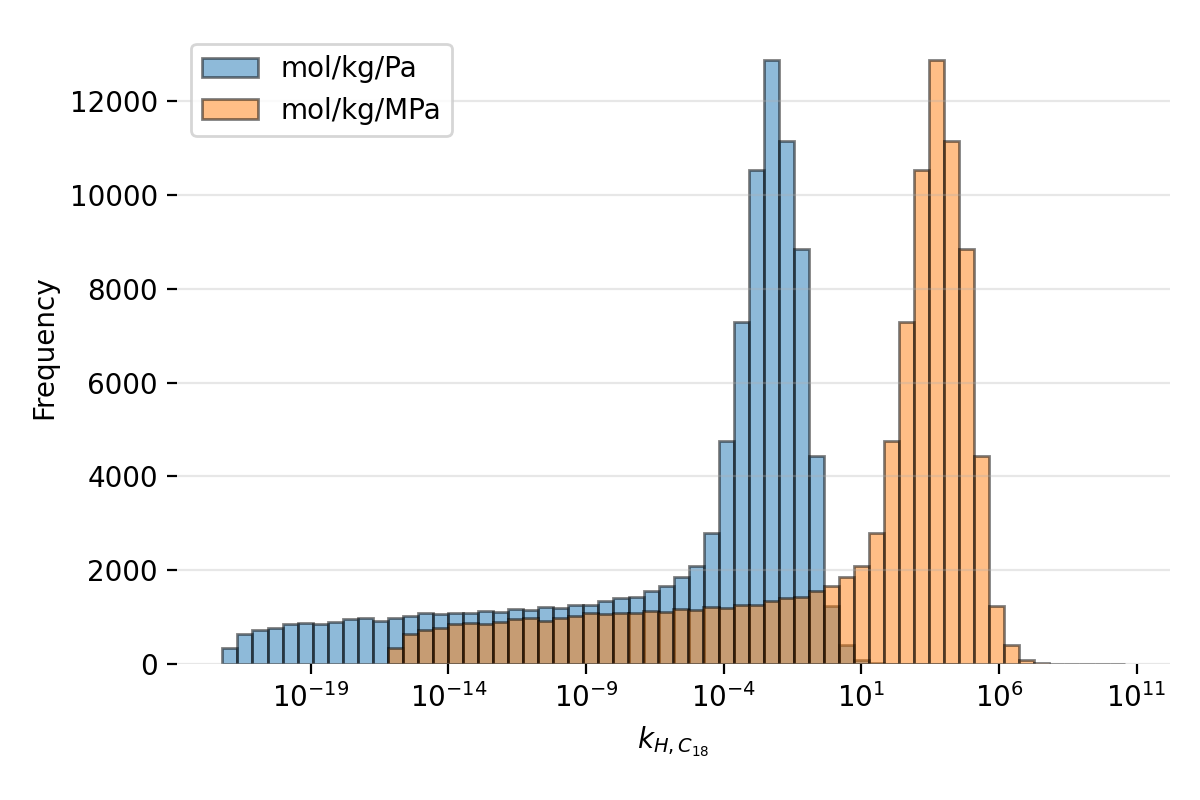

In [87]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.hist(no_0_kH_C18.kH_C18, 
        bins=np.logspace(np.log10(no_0_kH_C18.kH_C18.min()),
                         np.log10(no_0_kH_C18.kH_C18.max()),
                         50), 
        alpha=0.5, edgecolor='black', label='mol/kg/Pa')
ax.hist(no_0_kH_C18.kH_C18 * 1e6, 
        bins=np.logspace(np.log10(no_0_kH_C18.kH_C18.min() * 1e6),
                         np.log10(no_0_kH_C18.kH_C18.max() * 1e6),
                         50), 
        alpha=0.5, edgecolor='black', label='mol/kg/MPa')
ax.set_xlabel('$k_{H,C_{18}}$')
ax.set_xscale('log')
ax.set_ylabel('Frequency')
ax.grid(which='both', axis='y', alpha=0.3)
plt.tight_layout()
plt.legend()
plt.box(False)

<IPython.core.display.Javascript object>


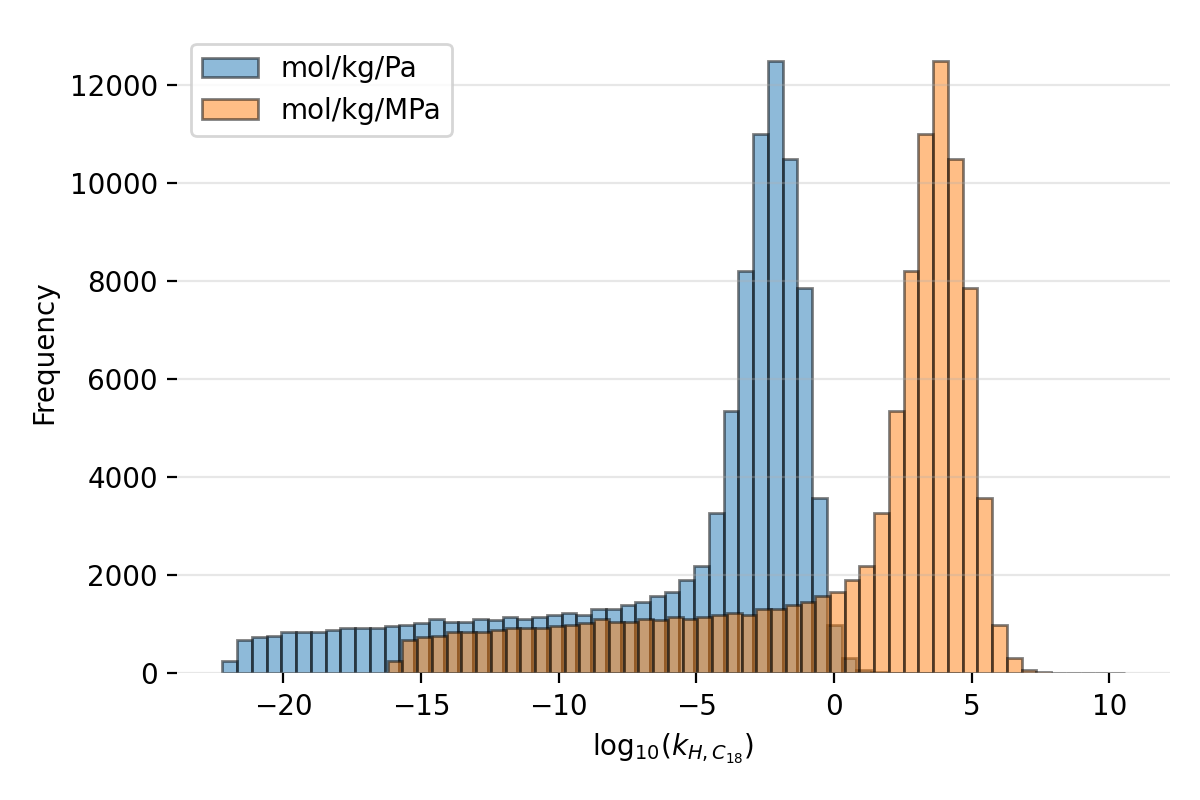

In [136]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.hist(np.log10(no_0_kH_C18.kH_C18), bins=50, alpha=0.5, edgecolor='black', label='mol/kg/Pa')
ax.hist(np.log10(no_0_kH_C18.kH_C18 * 1e6), bins=50, alpha=0.5, edgecolor='black', label='mol/kg/MPa')
ax.set_xlabel('log$_{10}(k_{H,C_{18}}$)')
ax.set_ylabel('Frequency')
ax.grid(which='both', axis='y', alpha=0.3)
plt.tight_layout()
plt.legend()
plt.box(False)

<IPython.core.display.Javascript object>


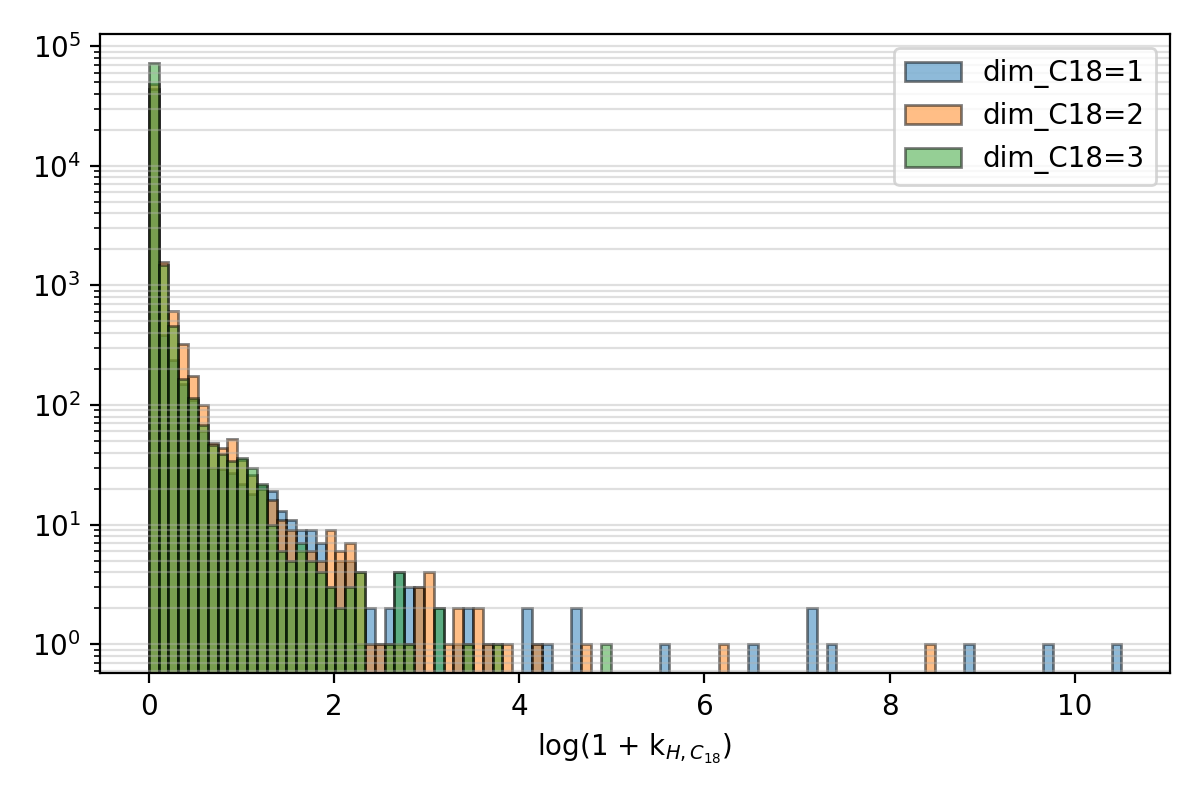

In [28]:
bins = np.linspace(
    np.log1p(nonzero_dim_C18.kH_C18.min()),
    np.log1p(nonzero_dim_C18.kH_C18.max()),
    100,
)

fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(np.log1p(nonzero_dim_C18.kH_C18[nonzero_dim_C18.dim_C18 == 1]), 
        bins=bins, alpha=0.5, edgecolor='black', label='dim_C18=1')
ax.hist(np.log1p(nonzero_dim_C18.kH_C18[nonzero_dim_C18.dim_C18 == 2]), 
        bins=bins, alpha=0.5, edgecolor='black', label='dim_C18=2')
ax.hist(np.log1p(nonzero_dim_C18.kH_C18[nonzero_dim_C18.dim_C18 == 3]), 
        bins=bins, alpha=0.5, edgecolor='black', label='dim_C18=3')
ax.set_xlabel('log(1 + k$_{H,C_{18}}$)')
ax.set_yscale('log')
ax.grid(which='both', axis='y', alpha=0.4)
ax.legend()

fig.tight_layout()